In [ ]:
# Libraries and utilities

import math
import matplotlib
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pylab as pl



from collections import defaultdict
from scipy.stats.stats import pearsonr

In [ ]:
import pandas as pd

# Specifica il percorso completo del file CSV
file_path = ('train.csv')

# Leggi il file CSV
df = pd.read_csv(file_path)

# Esegui le operazioni desiderate sui dati


In [ ]:
df.head()

name  duration_ms  explicit  popularity  \
0                             Long Road       241760     False          46   
1  Daniâl My Son, Where Did You Vanish?       444000     False           0   
2                    Ondskapens Galakse       333506     False           3   
3                       Can't Look Away       269800     False          23   
4                         Thunderground       307651     False          25   

                  artists              album_name  danceability  energy  key  \
0           Funki Porcini           Hed Phone Sex         0.690   0.513    5   
1           Siavash Amini    A Trail of Laughters         0.069   0.196    1   
2               Kvelertak              Nattesferd         0.363   0.854    2   
3       The Wood Brothers       One Drop of Truth         0.523   0.585    5   
4  The Darkraver;DJ Vince  Happy Hardcore Top 100         0.643   0.687    7   

   loudness  ...  liveness  valence    tempo  features_duration_ms  \
0   -12.529  ...     0.281   0.6350  142.221                241760   
1   -24.801  ...     0.360   0.0336   75.596                444000   
2    -7.445  ...     0.262   0.4890  116.628                333507   
3    -5.607  ...     0.117   0.3850  140.880                269800   
4   -11.340  ...     0.299   0.6370  143.956                307652   

   time_signature  n_beats  n_bars  popularity_confidence  processing  \
0             4.0    567.0   141.0                    NaN    1.279305   
1             4.0    617.0   155.0                    NaN    2.367412   
2             4.0    652.0   162.0                    NaN    3.700483   
3             4.0    619.0   155.0                  0.469    1.279305   
4             4.0    733.0   183.0                    NaN    4.067086   

         genre  
0      j-dance  
1      iranian  
2  black-metal  
3    bluegrass  
4        happy  

[5 rows x 24 columns]

In [ ]:
df.shape

(15000, 24)

In [ ]:
print('Types of columns\n', df.dtypes)
print('\nNumber of columns', len(df.columns))
print('\nCount of column types\n', df.dtypes.value_counts())
print('\nAll values\n', df.count())
print('\nNull values for columns\n', df.isna().sum())

Types of columns
 name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

Number of columns 24

Count of column types
 float64    15
object      4
int64       4
bool        1
dtype: int64

All values
 name                     15000
duration_ms      

In [ ]:
# Inizializza le liste per le variabili continue, discrete e categoriche
variabili_continue = []
variabili_discrete = []
variabili_categoriche = []

# Analizza il DataFrame per classificare le variabili
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        if df[col].nunique() > 5:  # Se ha più di 5 valori unici, consideralo continuo
            variabili_continue.append(col)
        else:
            variabili_discrete.append(col)
    else:
        variabili_categoriche.append(col)

# Stampare i risultati
print("Variabili continue:", variabili_continue)
print("Variabili discrete:", variabili_discrete)
print("Variabili categoriche:", variabili_categoriche)


Variabili continue: ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'features_duration_ms', 'n_beats', 'n_bars', 'popularity_confidence', 'processing']
Variabili discrete: ['explicit', 'mode', 'time_signature']
Variabili categoriche: ['name', 'artists', 'album_name', 'genre']


Dataset con 24 colonne, ciascuna da 15000 valori tranne popularity_confidence con 2217



**Variabili continue**: ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'features_duration_ms', 'n_beats', 'n_bars', 'popularity_confidence', 'processing']

**Variabili discrete**: ['explicit', 'mode', 'time_signature']



**Variabili categoriche**: ['name', 'artists', 'album_name', 'genre']

**valori mancanti** per:




*   mode  con 4450 valori

Questo valore rappresenta se una traccia musicale è scritta in una tonalità "maggiore" o "minore"

Modalità Maggiore (1):

Le tracce in modalità maggiore tendono ad avere un suono più "felice" o "gioioso".
Solitamente hanno una sensazione più luminosa e ottimistica.
Sono spesso utilizzate in brani che trasmettono emozioni positive.


Modalità Minore (0):

Le tracce in modalità minore tendono ad avere un suono più "triste" o "malinconico".
Solitamente hanno una sensazione più scura e introspettiva.
Sono spesso utilizzate in brani che trasmettono emozioni più tristi o malinconiche.




*   time_signature con 2062 valori

Valore che fornisce un'indicazione stimata del tempo o della firma temporale di una traccia musicale. La firma temporale in un brano rappresenta il numero di battiti musicali in ogni misura musicale e il tipo di nota che rappresenta un battito

* popularity_confidence con  12783

Valore rappresenta il grado di certezza o fiducia che una fonte di dati ha nella popolarità della canzone.



La colonna "popularity_confidence" nel tuo dataset indica la "confidenza di popolarità" di una canzone ed è espressa come un valore compreso tra 0.0 e 1.0. Questo valore rappresenta il grado di certezza o fiducia che una fonte di dati ha nella popolarità della canzone. In parole semplici, quanto più alto è il valore di "popularity_confidence", tanto maggiore è la fiducia nella popolarità della canzone, mentre un valore più basso indica una fiducia minore.

Ecco come puoi interpretare questa colonna:

Valore 0.0: Indica che la fonte di dati ha zero fiducia nella popolarità della canzone. Potrebbe significare che la canzone è molto poco conosciuta o che ci sono dubbi sulla sua popolarità.

Valore 1.0: Indica la massima fiducia nella popolarità della canzone. La fonte di dati è estremamente sicura che la canzone sia popolare.

Valori intermedi (ad esempio, 0.5): Indicano un grado di fiducia parziale. In questo caso, la fonte di dati ha un certo grado di certezza sulla popolarità della canzone, ma non è completamente sicura.



non dropperò nessuna variabile poichè ritengo che tutte abbiano una sua importanza, inoltre avendo a che fare con un dataset di dimensioni abbastanza ridotte non risulta troppo difficile la gestione di tutte le 24 colonne


## 1.2 Distribution of the variables and statistics

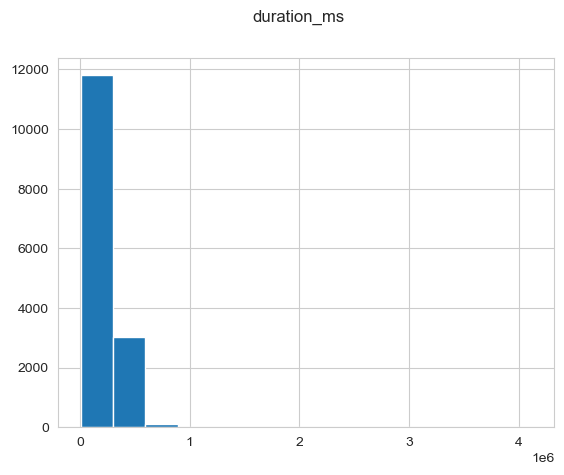

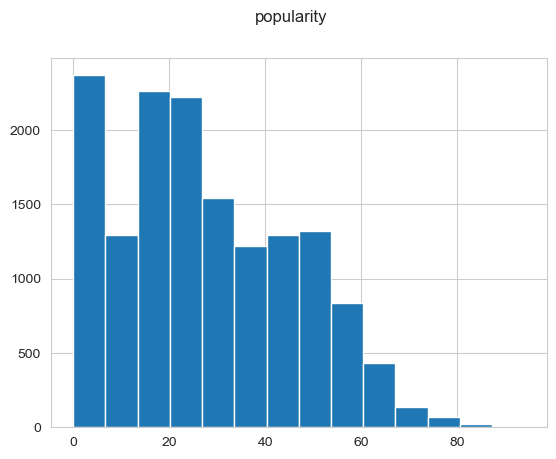

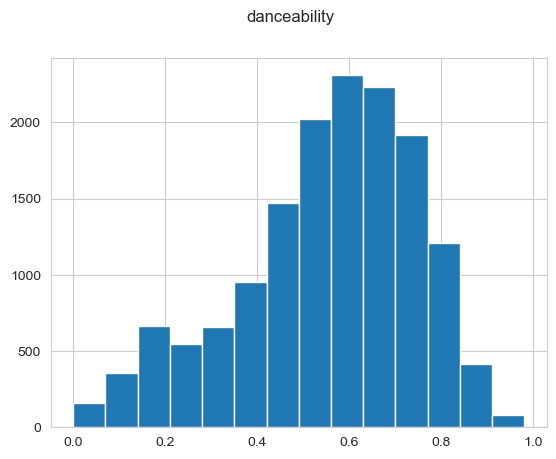

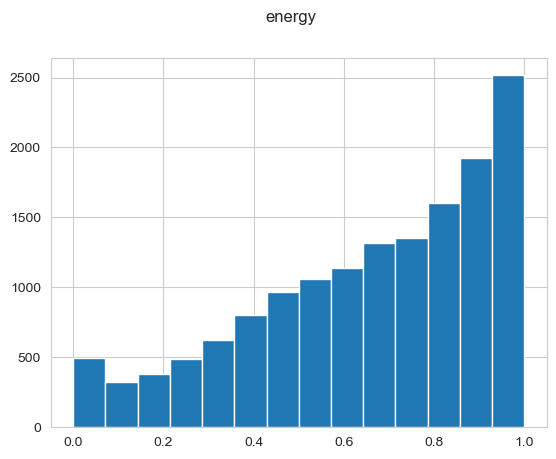

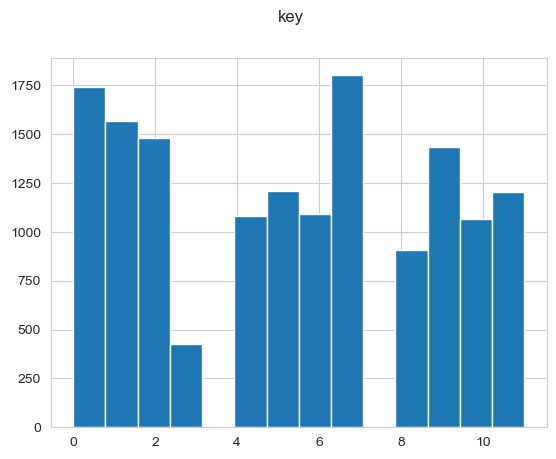

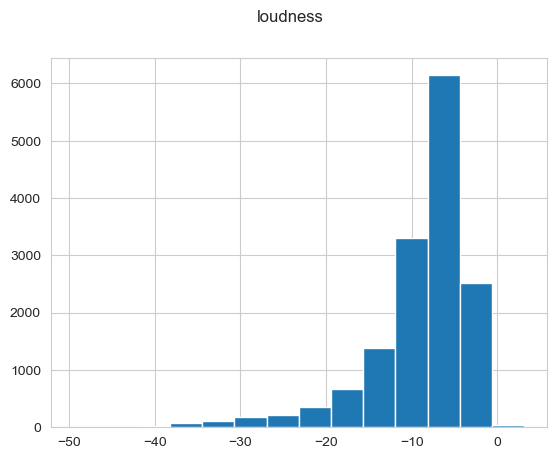

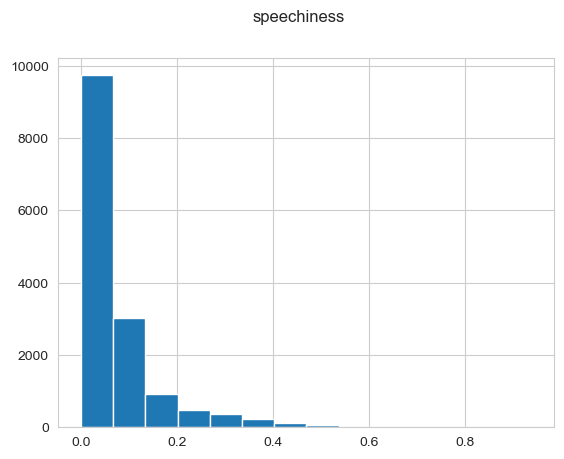

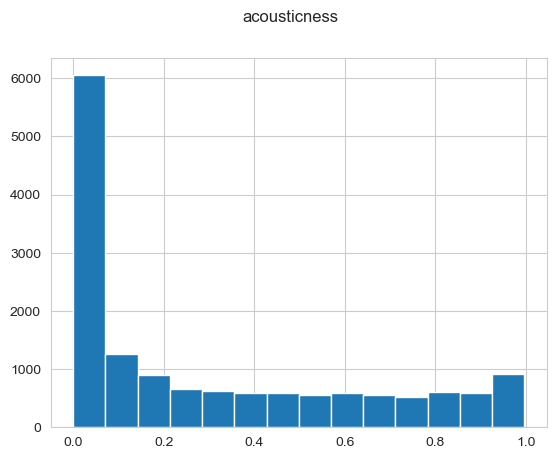

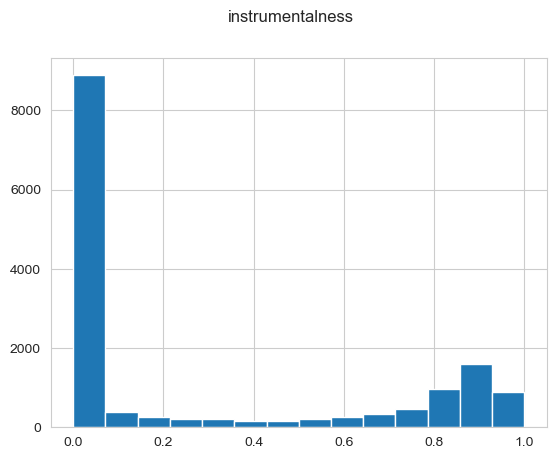

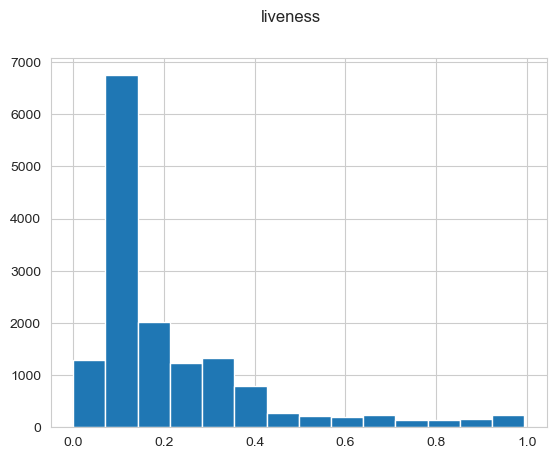

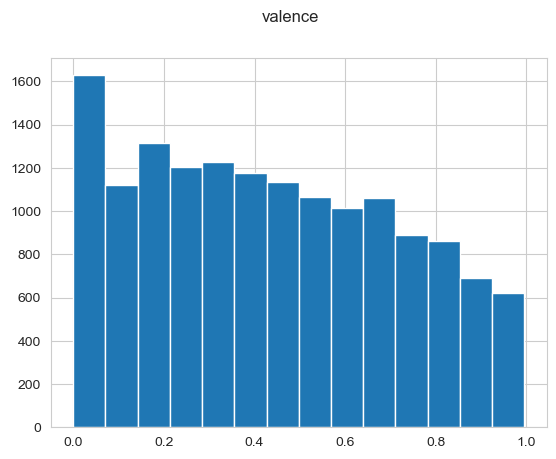

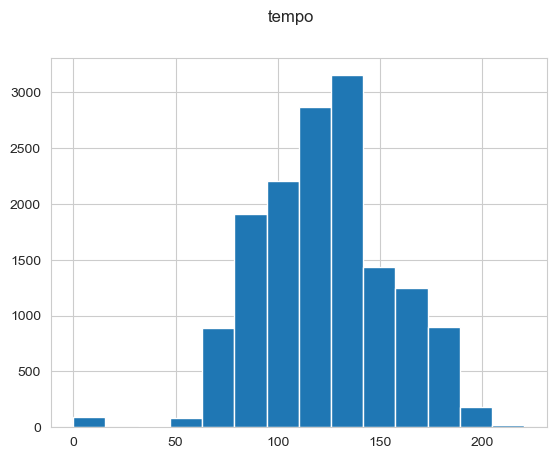

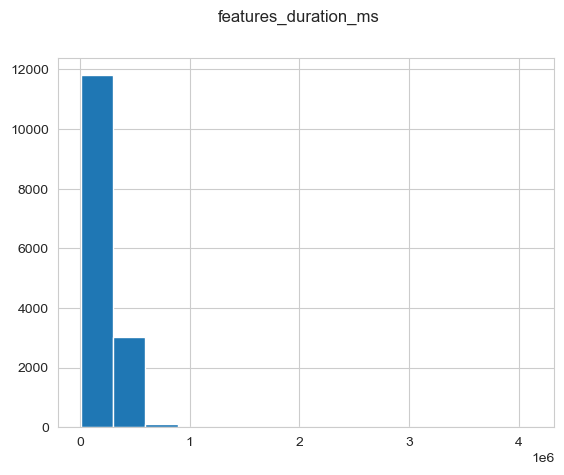

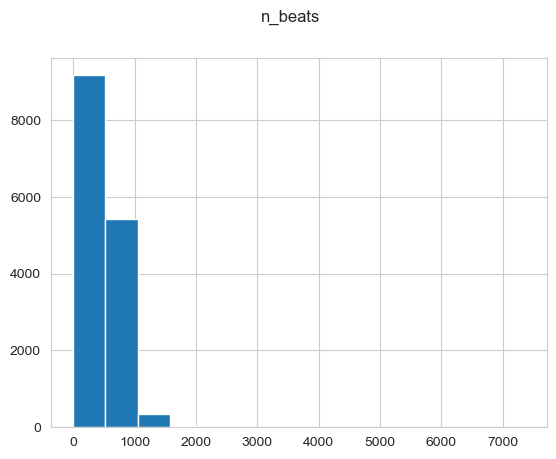

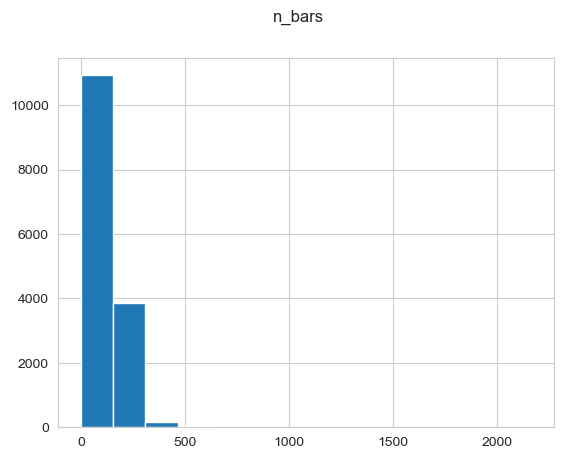

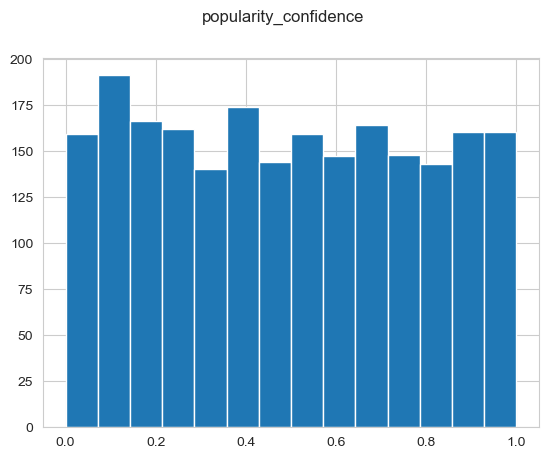

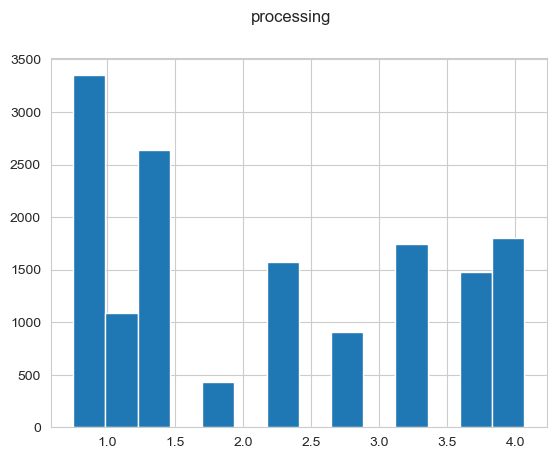

In [ ]:
n=len(df)
for column in variabili_continue:
    plt.figure()
    df[column].hist(bins=int(np.log2(n))+1)
    pl.suptitle(column)

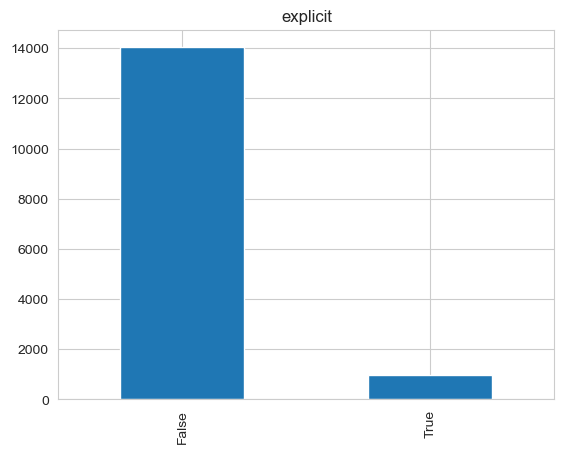

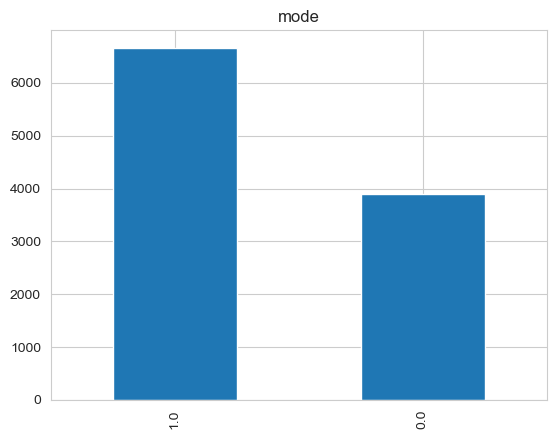

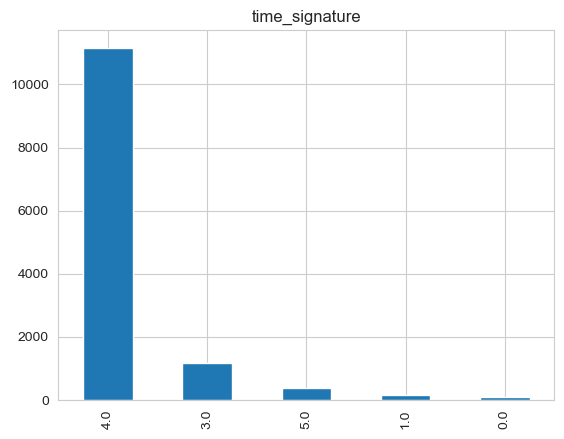

In [ ]:
for column in variabili_discrete:
    plt.figure()
    df[column].value_counts().plot(kind='bar', title=column)

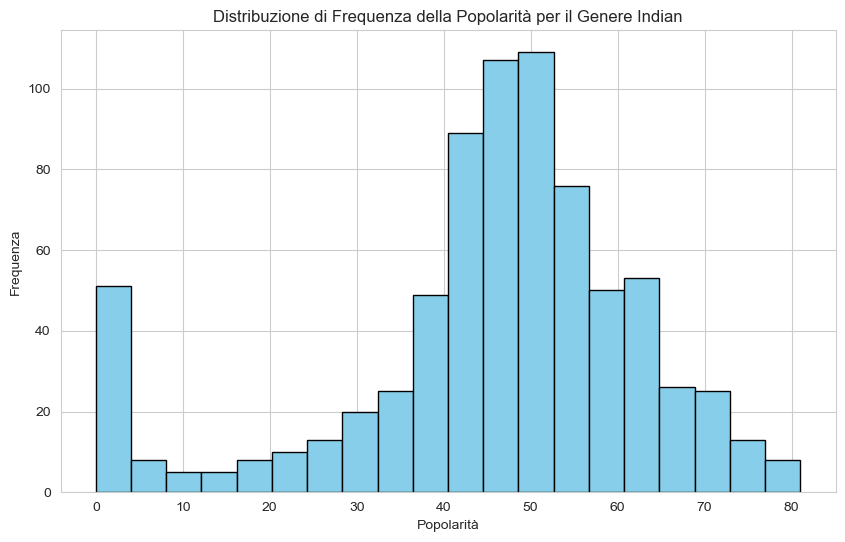

In [ ]:
indian_data = df[df['genre'] == 'indian']

# Crea un istogramma della popolarità
plt.figure(figsize=(10, 6))
plt.hist(indian_data['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuzione di Frequenza della Popolarità per il Genere Indian')
plt.xlabel('Popolarità')
plt.ylabel('Frequenza')
plt.show()

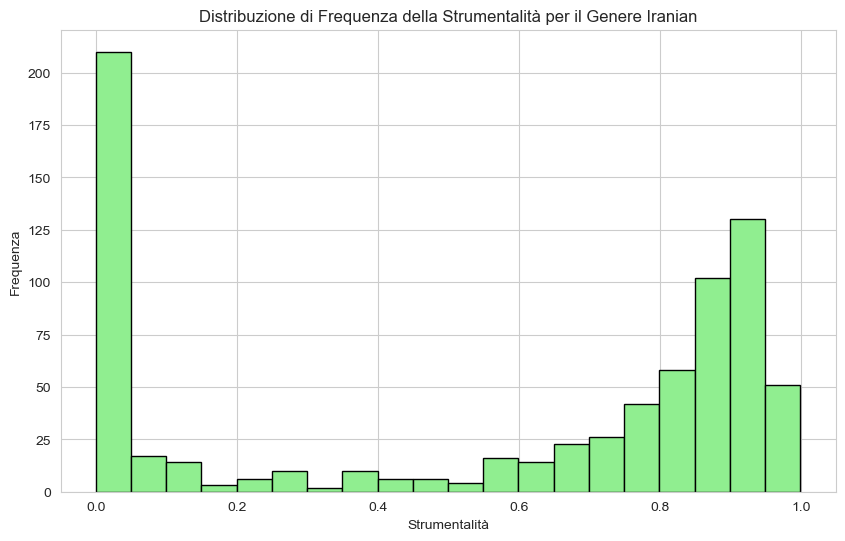

In [ ]:
# Supponiamo che il tuo DataFrame sia chiamato "df"
# Filtra il DataFrame solo per il genere "Iranian"
iranian_data = df[df['genre'] == 'iranian']

# Crea un istogramma della strumentalità
plt.figure(figsize=(10, 6))
plt.hist(iranian_data['instrumentalness'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribuzione di Frequenza della Strumentalità per il Genere Iranian')
plt.xlabel('Strumentalità')
plt.ylabel('Frequenza')
plt.show()


In [ ]:
import pandas as pd

# Supponiamo che il tuo DataFrame sia chiamato "df"
# Stampa i valori univoci nella colonna "Genre"
unique_genres = df['genre'].unique()
print("Valori univoci nella colonna 'Genre':")
for genre in unique_genres:
    print(genre)


Valori univoci nella colonna 'Genre':
j-dance
iranian
black-metal
bluegrass
happy
industrial
j-idol
spanish
sleep
techno
mandopop
afrobeat
disney
study
indian
idm
forro
chicago-house
brazil
breakbeat


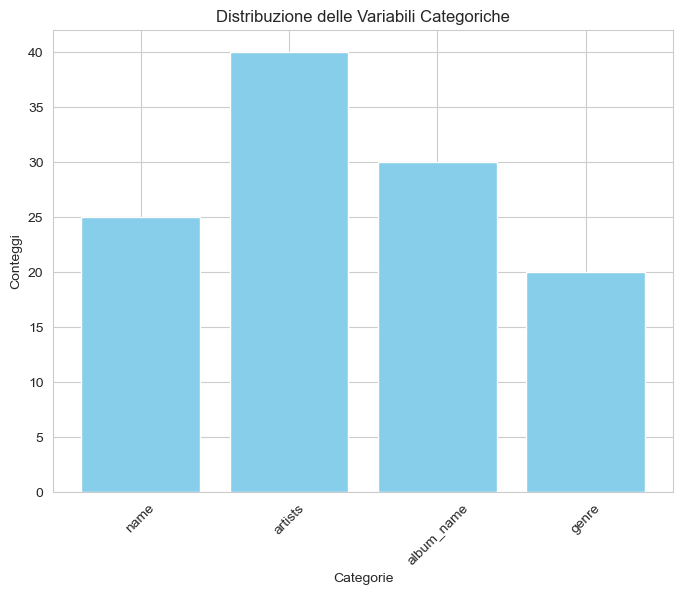

In [ ]:
import matplotlib.pyplot as plt

# Dati di esempio
categorie = ['name', 'artists', 'album_name', 'genre']
conteggi = [25, 40, 30, 20]  # I conteggi rappresentano il numero di osservazioni in ciascuna categoria

# Creazione del grafico a barre
plt.figure(figsize=(8, 6))
plt.bar(categorie, conteggi, color='skyblue')
plt.xlabel('Categorie')
plt.ylabel('Conteggi')
plt.title('Distribuzione delle Variabili Categoriche')
plt.xticks(rotation=45)  # Rotazione delle etichette sull'asse x se necessario

# Visualizza il grafico
plt.show()




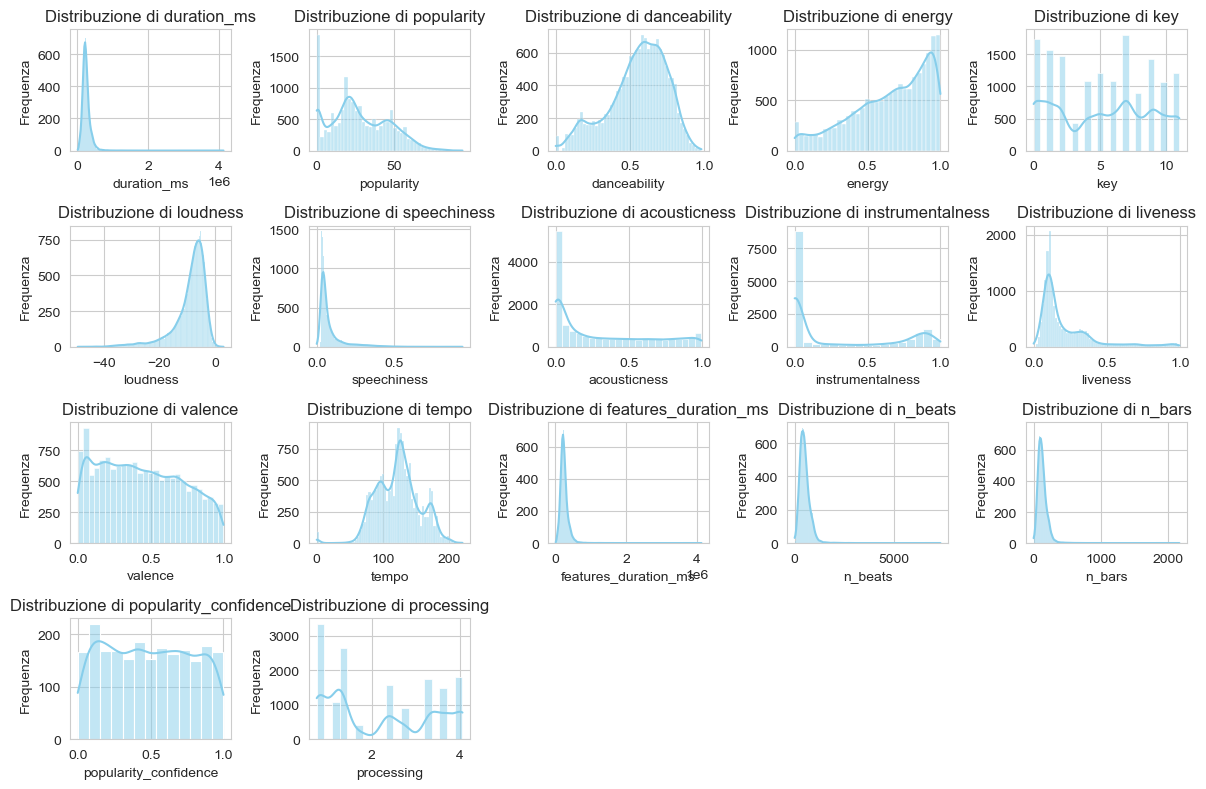

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista delle tue variabili continue
variabili_continue = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'features_duration_ms', 'n_beats', 'n_bars', 'popularity_confidence', 'processing']

# Creazione di istogrammi per le variabili continue
plt.figure(figsize=(12, 8))

for i, var in enumerate(variabili_continue, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.xlabel(var)
    plt.ylabel('Frequenza')
    plt.title(f'Distribuzione di {var}')

plt.tight_layout()
plt.show()


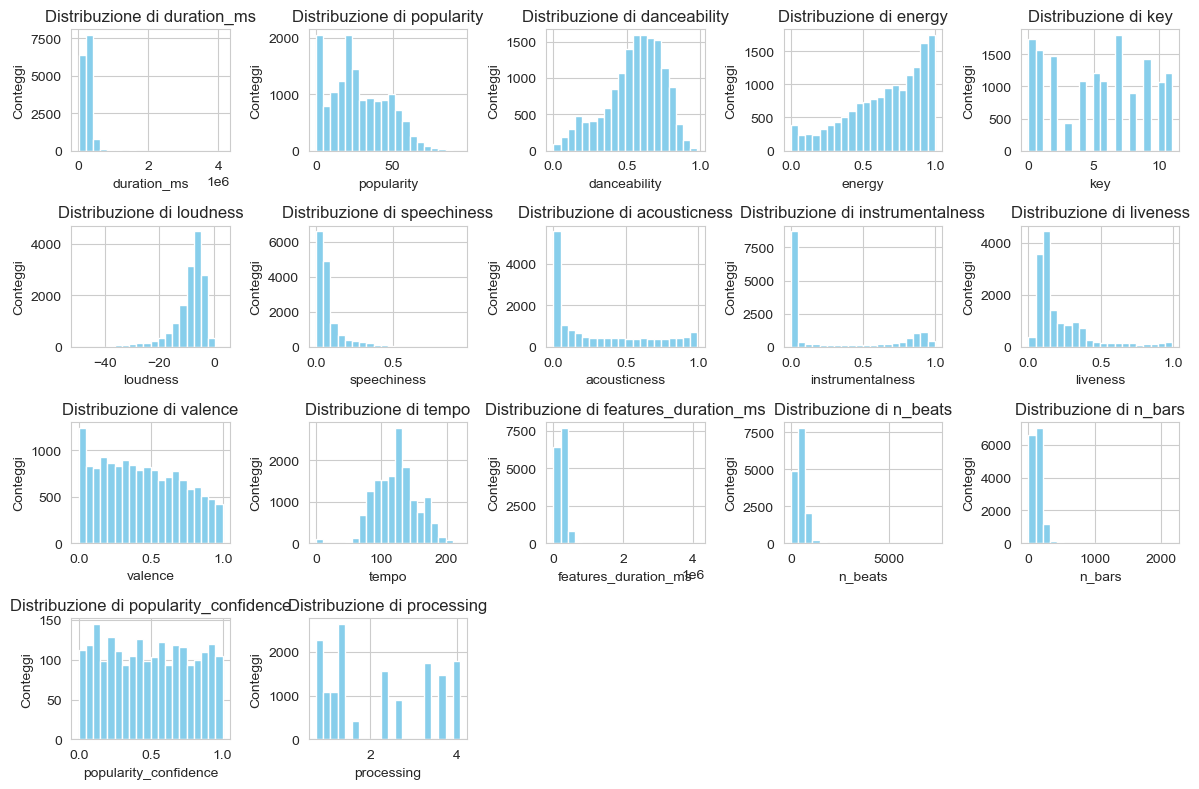

In [ ]:
import matplotlib.pyplot as plt

# Lista delle tue variabili continue
variabili_continue = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'features_duration_ms', 'n_beats', 'n_bars', 'popularity_confidence', 'processing']

# Creazione di grafici a barre per le variabili continue
plt.figure(figsize=(12, 8))

for i, var in enumerate(variabili_continue, 1):
    plt.subplot(4, 5, i)
    plt.hist(df[var], bins=20, color='skyblue')  # Modifica il numero di bin se necessario
    plt.xlabel(var)
    plt.ylabel('Conteggi')
    plt.title(f'Distribuzione di {var}')

plt.tight_layout()
plt.show()


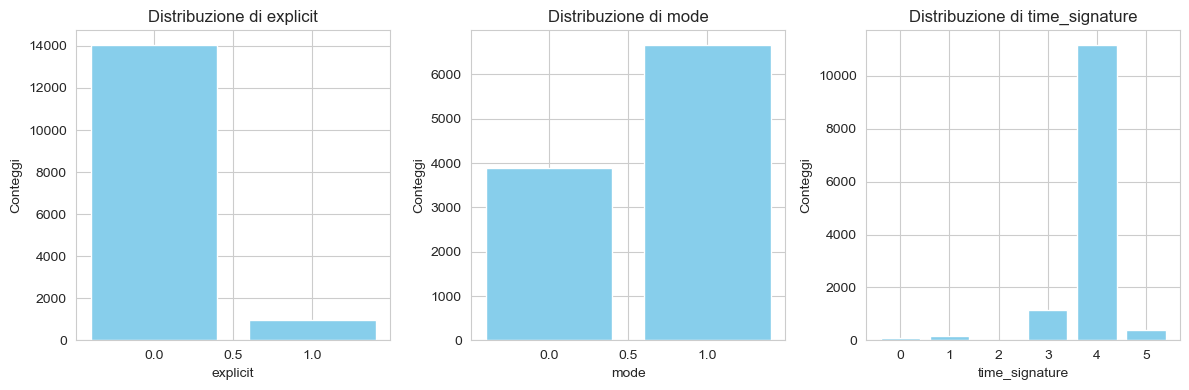

In [ ]:
import matplotlib.pyplot as plt

# Lista delle tue variabili discrete
variabili_discrete = ['explicit', 'mode', 'time_signature']

# Creazione di grafici a barre per le variabili discrete
plt.figure(figsize=(12, 4))

for i, var in enumerate(variabili_discrete, 1):
    plt.subplot(1, 3, i)
    plt.bar(df[var].value_counts().index, df[var].value_counts().values, color='skyblue')
    plt.xlabel(var)
    plt.ylabel('Conteggi')
    plt.title(f'Distribuzione di {var}')

plt.tight_layout()
plt.show()




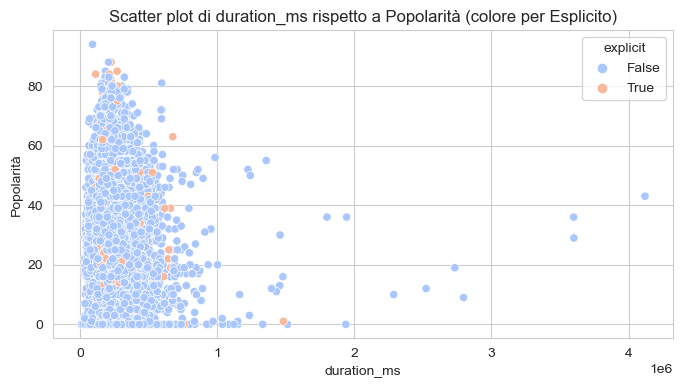

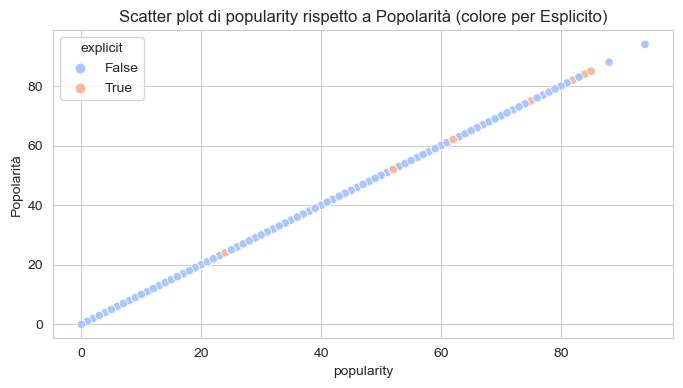

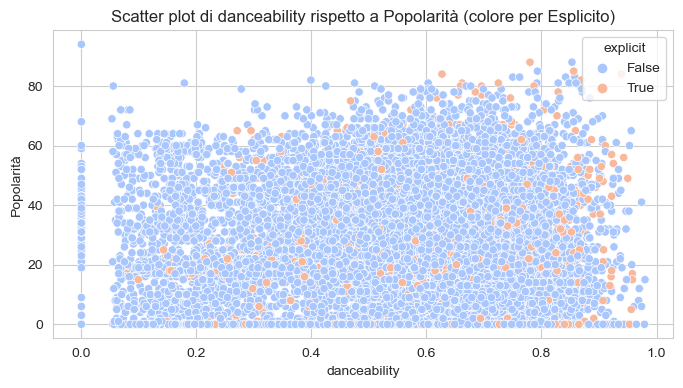

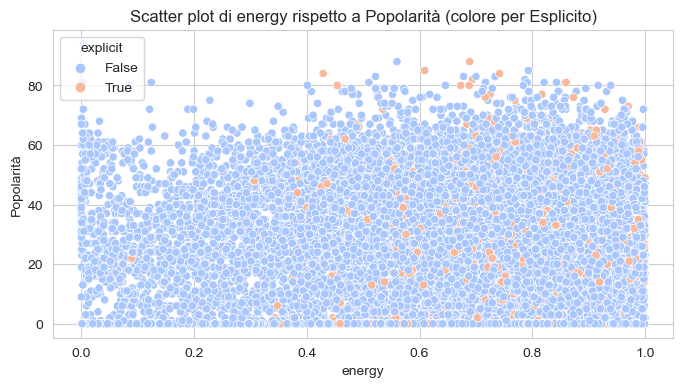

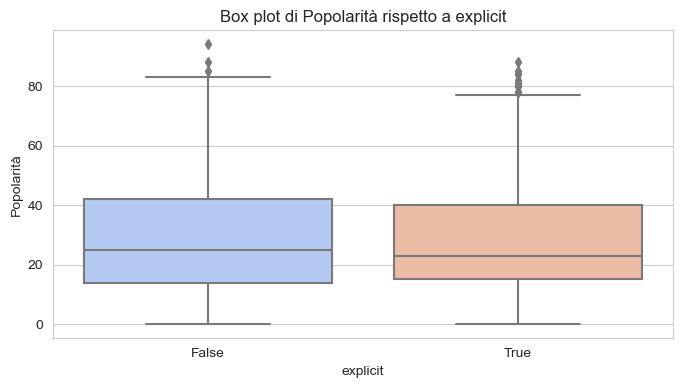

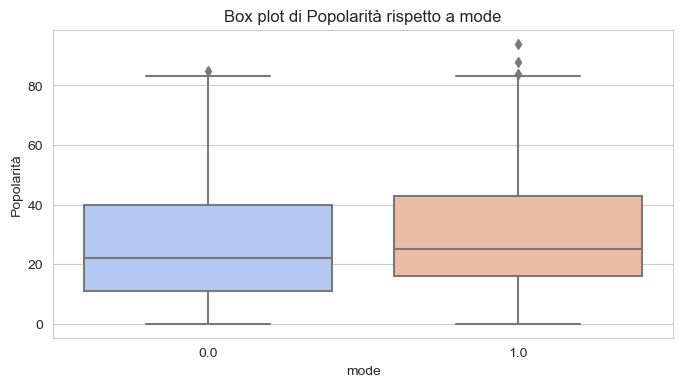

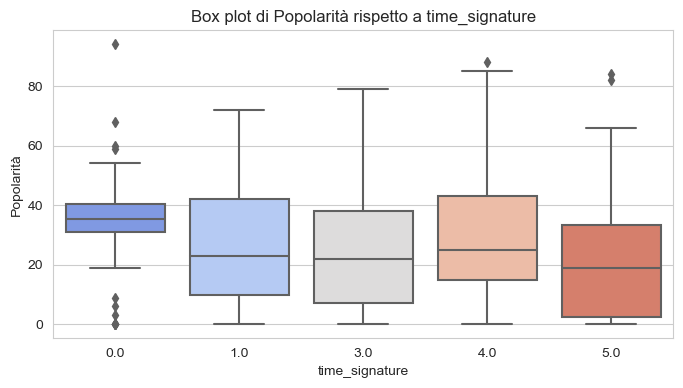

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione delle variabili continue e discrete
variabili_continue = ['duration_ms', 'popularity', 'danceability', 'energy']
variabili_discrete = ['explicit', 'mode', 'time_signature']

# Creazione di un grafico a dispersione (scatter plot) per il confronto tra variabili continue
for var in variabili_continue:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=var, y='popularity', hue='explicit', data=df, palette='coolwarm')
    plt.title(f'Scatter plot di {var} rispetto a Popolarità (colore per Esplicito)')
    plt.xlabel(var)
    plt.ylabel('Popolarità')
    plt.show()

# Creazione di un box plot per il confronto tra variabili discrete e variabili continue
for var in variabili_discrete:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=var, y='popularity', data=df, palette='coolwarm')
    plt.title(f'Box plot di Popolarità rispetto a {var}')
    plt.xlabel(var)
    plt.ylabel('Popolarità')
    plt.show()


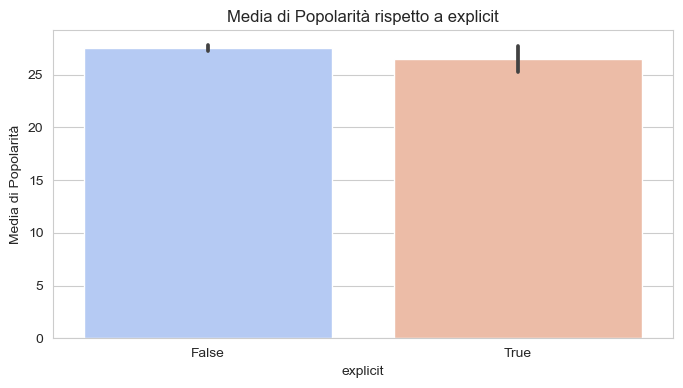

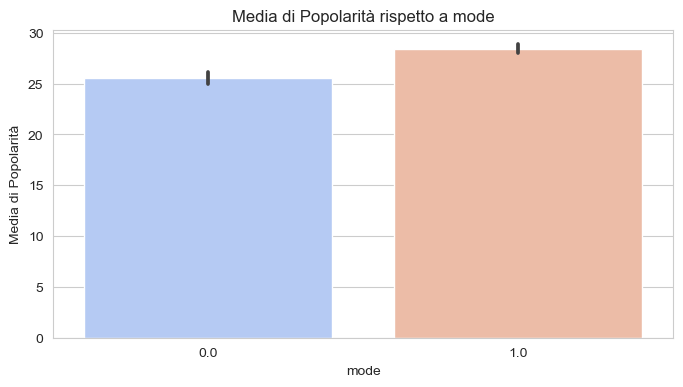

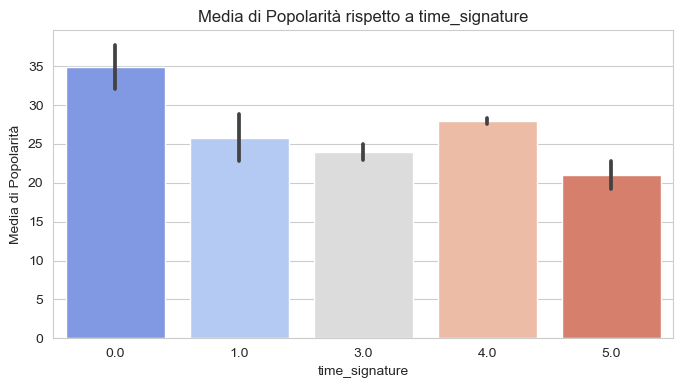

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione delle variabili continue e discrete
variabili_continue = ['duration_ms', 'popularity', 'danceability', 'energy']
variabili_discrete = ['explicit', 'mode', 'time_signature']

# Creazione di grafici a barre per la media delle variabili continue rispetto alle variabili discrete
for var_discrete in variabili_discrete:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=var_discrete, y='popularity', data=df, palette='coolwarm')
    plt.title(f'Media di Popolarità rispetto a {var_discrete}')
    plt.xlabel(var_discrete)
    plt.ylabel('Media di Popolarità')
    plt.show()


In [ ]:


name_artists = pd.crosstab(df['name'], df['artists']) #confusion_matrix
name_album_name = pd.crosstab(df['name'], df['album_name']) #confusion_matrix
name_genre = pd.crosstab(df['name'], df['genre']) #confusion_matrix
artists_album_name= pd.crosstab(df['artists'], df['album_name']) #confusion_matrix
artists_genre = pd.crosstab(df['artists'], df['genre']) #confusion_matrix
album_name_genre= pd.crosstab(df['album_name'], df['genre']) #confusion_matrix


explicit_name = pd.crosstab(df['name'], df['explicit']) #confusion_matrix
explicit_artists = pd.crosstab(df['artists'], df['explicit']) #confusion_matrix
explicit_album_name = pd.crosstab(df['album_name'], df['explicit']) #confusion_matrix
explicit_genre = pd.crosstab(df['genre'], df['explicit']) #confusion_matrix


mode_name = pd.crosstab(df['name'], df['mode']) #confusion_matrix
mode_artists = pd.crosstab(df['artists'], df['mode']) #confusion_matrix
mode_album_name = pd.crosstab(df['album_name'], df['mode']) #confusion_matrix
mode_genre = pd.crosstab(df['genre'], df['mode']) #confusion_matrix


time_signature_name = pd.crosstab(df['name'], df['time_signature']) #confusion_matrix
time_signature_artists = pd.crosstab(df['artists'], df['time_signature']) #confusion_matrix
time_signature_album_name = pd.crosstab(df['album_name'], df['time_signature']) #confusion_matrix
time_signature_genre = pd.crosstab(df['genre'], df['time_signature']) #confusion_matrix



In [ ]:
# Conta il numero di valori "1" in ogni colonna della tabella artists_genre
conteggio_artisti_per_genere = artists_genre.sum()

# Visualizza il conteggio
print(conteggio_artisti_per_genere)


genre
afrobeat         750
black-metal      750
bluegrass        750
brazil           750
breakbeat        750
chicago-house    750
disney           750
forro            750
happy            750
idm              750
indian           750
industrial       750
iranian          750
j-dance          750
j-idol           750
mandopop         750
sleep            750
spanish          750
study            750
techno           750
dtype: int64


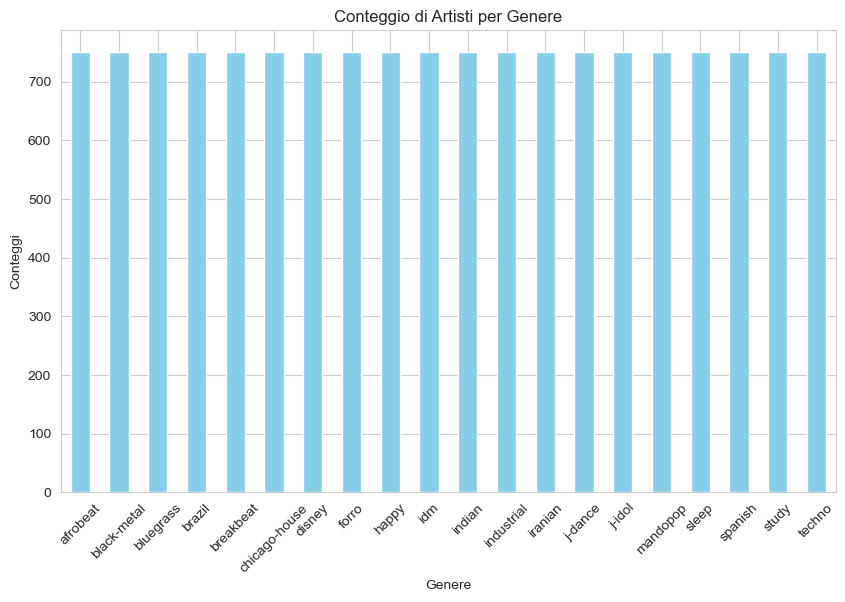

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ogni genere
plt.figure(figsize=(10, 6))
conteggio_artisti_per_genere.plot(kind='bar', color='skyblue')
plt.xlabel('Genere')
plt.ylabel('Conteggi')
plt.title('Conteggio di Artisti per Genere')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Conta il numero di valori "1" in ogni colonna della tabella artists_genre
conteggio_album_name_genre = album_name_genre.sum()

# Visualizza il conteggio
print(conteggio_album_name_genre)

genre
afrobeat         750
black-metal      750
bluegrass        750
brazil           750
breakbeat        750
chicago-house    750
disney           750
forro            750
happy            750
idm              750
indian           750
industrial       750
iranian          750
j-dance          750
j-idol           750
mandopop         750
sleep            750
spanish          750
study            750
techno           750
dtype: int64


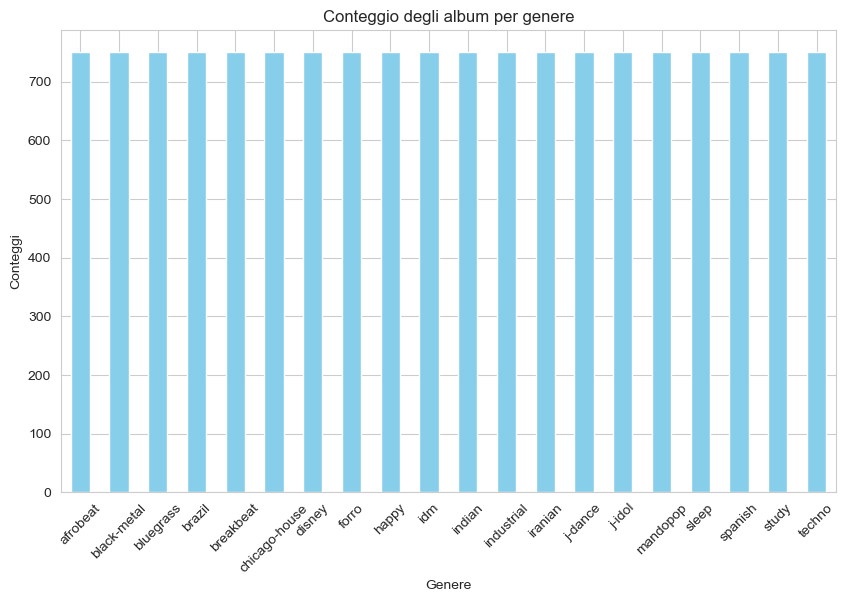

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ogni genere
plt.figure(figsize=(10, 6))
conteggio_album_name_genre.plot(kind='bar', color='skyblue')
plt.xlabel('Genere')
plt.ylabel('Conteggi')
plt.title('Conteggio degli album per genere')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Conta il numero di valori "1" in ogni colonna della tabella explicit_name
conteggio_espliciti_per_nome = explicit_name.sum()

# Visualizza il conteggio
print(conteggio_espliciti_per_nome)


explicit
False    14034
True       966
dtype: int64


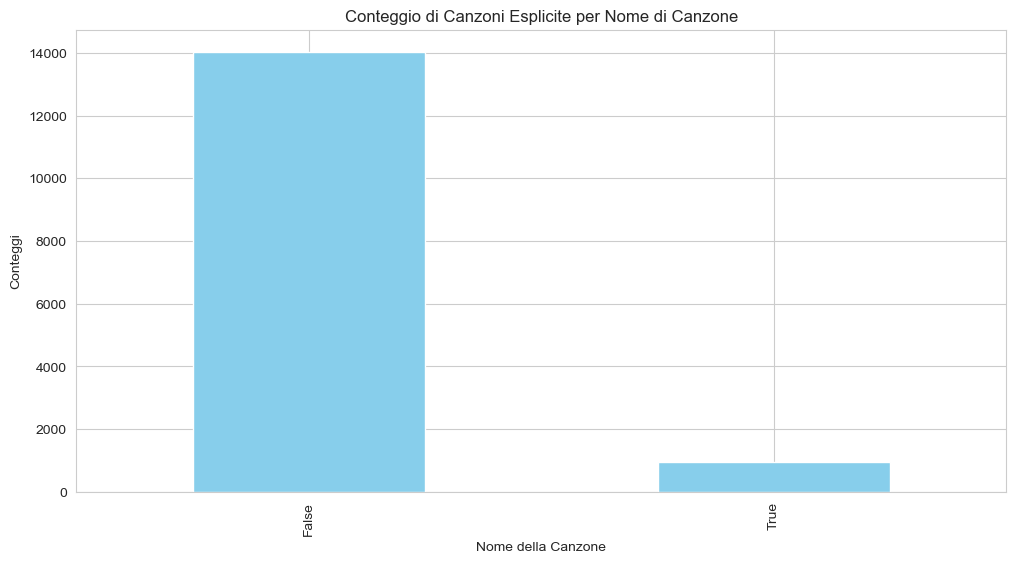

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ciascun nome di canzone
plt.figure(figsize=(12, 6))
conteggio_espliciti_per_nome.plot(kind='bar', color='skyblue')
plt.xlabel('Nome della Canzone')
plt.ylabel('Conteggi')
plt.title('Conteggio di Canzoni Esplicite per Nome di Canzone')
plt.xticks(rotation=90)
plt.show()


In [ ]:

# Conta il numero di valori "1" in ogni colonna della tabella explicit_artists
conteggio_espliciti_per_artisti = explicit_artists.sum()

# Visualizza il conteggio
print(conteggio_espliciti_per_artisti)


explicit
False    14034
True       966
dtype: int64


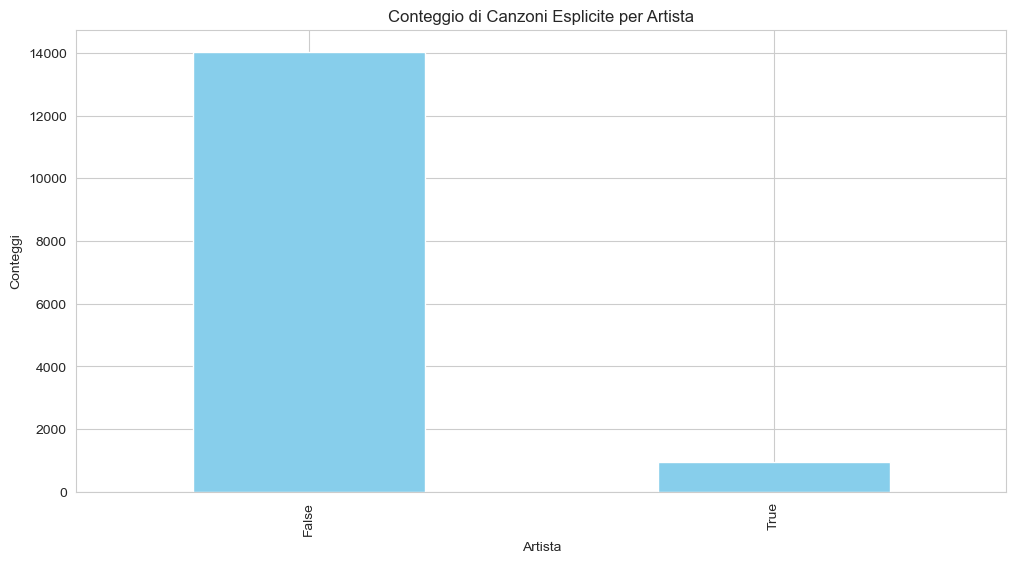

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ciascun artista
plt.figure(figsize=(12, 6))
conteggio_espliciti_per_artisti.plot(kind='bar', color='skyblue')
plt.xlabel('Artista')
plt.ylabel('Conteggi')
plt.title('Conteggio di Canzoni Esplicite per Artista')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Conta il numero di valori "1" in ogni colonna della tabella explicit_album_name
conteggio_espliciti_per_album = explicit_album_name.sum()

# Visualizza il conteggio
print(conteggio_espliciti_per_album)


explicit
False    14034
True       966
dtype: int64


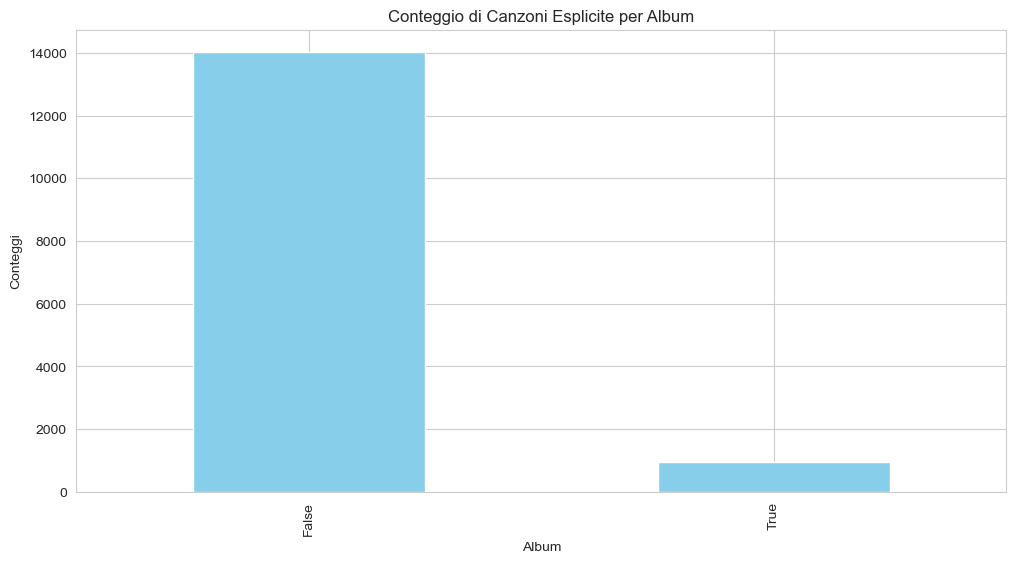

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ciascun album
plt.figure(figsize=(12, 6))
conteggio_espliciti_per_album.plot(kind='bar', color='skyblue')
plt.xlabel('Album')
plt.ylabel('Conteggi')
plt.title('Conteggio di Canzoni Esplicite per Album')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Conta il numero di valori "1" in ogni colonna della tabella explicit_genre
conteggio_espliciti_per_genere = explicit_genre.sum()

# Visualizza il conteggio
print(conteggio_espliciti_per_genere)



explicit
False    14034
True       966
dtype: int64


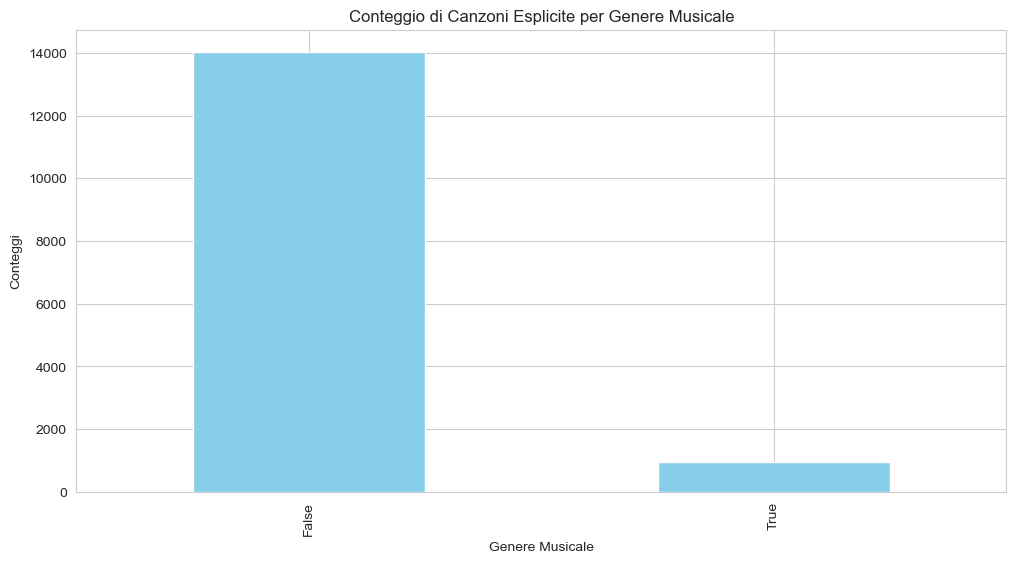

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ciascun genere
plt.figure(figsize=(12, 6))
conteggio_espliciti_per_genere.plot(kind='bar', color='skyblue')
plt.xlabel('Genere Musicale')
plt.ylabel('Conteggi')
plt.title('Conteggio di Canzoni Esplicite per Genere Musicale')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Conta il numero di valori "0" e "1" in ogni colonna della tabella mode_name
conteggio_mode_per_nome = mode_name.sum()

# Visualizza il conteggio
print(conteggio_mode_per_nome)


mode
0.0    3889
1.0    6661
dtype: int64


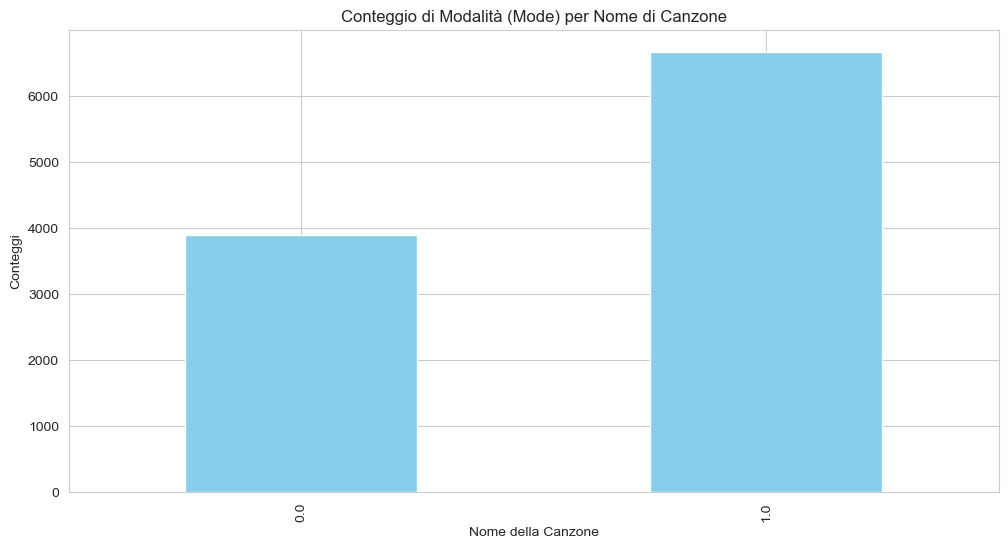

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ciascun nome di canzone
plt.figure(figsize=(12, 6))
conteggio_mode_per_nome.plot(kind='bar', color='skyblue')
plt.xlabel('Nome della Canzone')
plt.ylabel('Conteggi')
plt.title('Conteggio di Modalità (Mode) per Nome di Canzone')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Conta il numero di valori "0" e "1" in ogni colonna della tabella mode_artists
conteggio_mode_per_artisti = mode_artists.sum()

# Visualizza il conteggio
print(conteggio_mode_per_artisti)


mode
0.0    3889
1.0    6661
dtype: int64


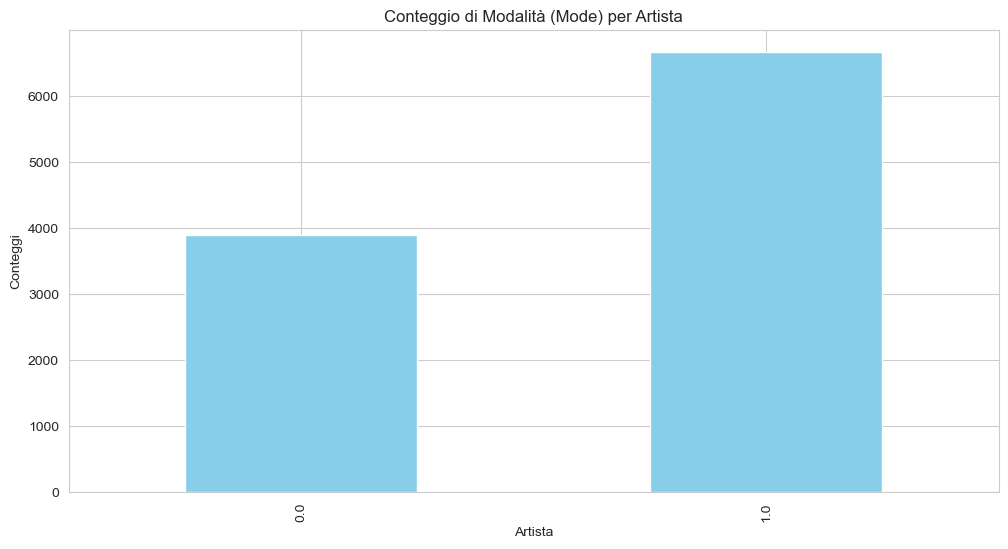

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ciascun artista
plt.figure(figsize=(12, 6))
conteggio_mode_per_artisti.plot(kind='bar', color='skyblue')
plt.xlabel('Artista')
plt.ylabel('Conteggi')
plt.title('Conteggio di Modalità (Mode) per Artista')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Conta il numero di valori "0" e "1" in ogni colonna della tabella mode_album_name
conteggio_mode_per_album = mode_album_name.sum()

# Visualizza il conteggio
print(conteggio_mode_per_album)


mode
0.0    3889
1.0    6661
dtype: int64


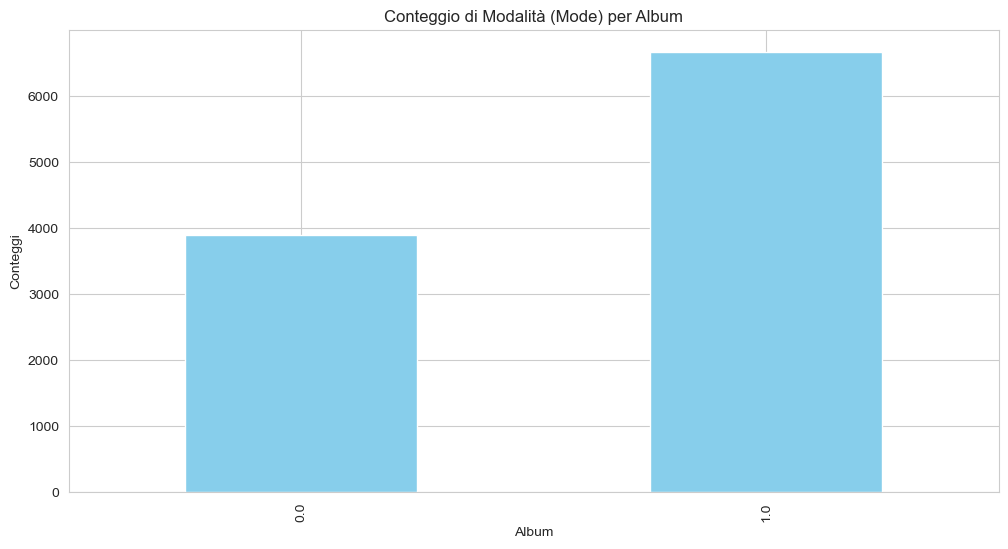

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ciascun album
plt.figure(figsize=(12, 6))
conteggio_mode_per_album.plot(kind='bar', color='skyblue')
plt.xlabel('Album')
plt.ylabel('Conteggi')
plt.title('Conteggio di Modalità (Mode) per Album')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Conta il numero di valori "0" e "1" in ogni colonna della tabella mode_genre
conteggio_mode_per_genere = mode_genre.sum()

# Visualizza il conteggio
print(conteggio_mode_per_genere)



mode
0.0    3889
1.0    6661
dtype: int64


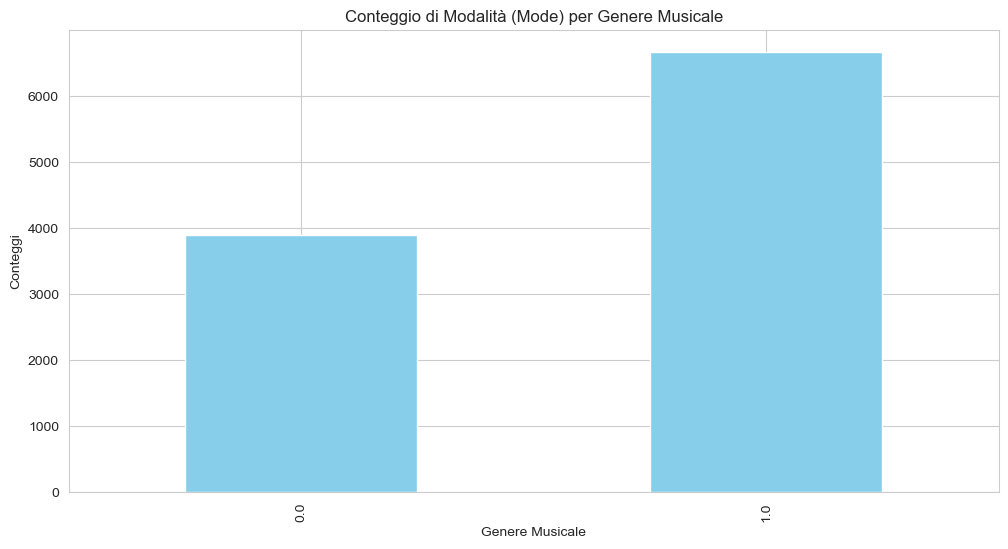

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ciascun genere musicale
plt.figure(figsize=(12, 6))
conteggio_mode_per_genere.plot(kind='bar', color='skyblue')
plt.xlabel('Genere Musicale')
plt.ylabel('Conteggi')
plt.title('Conteggio di Modalità (Mode) per Genere Musicale')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Conta il numero di valori per ciascuna modalità in ogni colonna della tabella time_signature_name
conteggio_time_signature_per_nome = time_signature_name.sum()

# Visualizza il conteggio
print(conteggio_time_signature_per_nome)


time_signature
0.0       92
1.0      149
3.0     1162
4.0    11160
5.0      375
dtype: int64


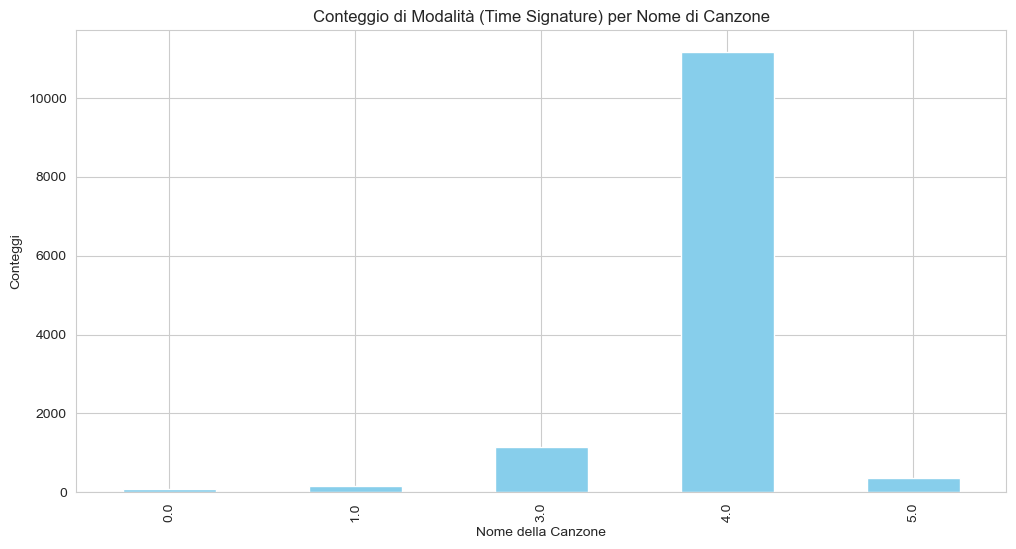

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ciascun nome di canzone
plt.figure(figsize=(12, 6))
conteggio_time_signature_per_nome.plot(kind='bar', color='skyblue')
plt.xlabel('Nome della Canzone')
plt.ylabel('Conteggi')
plt.title('Conteggio di Modalità (Time Signature) per Nome di Canzone')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Conta il numero di valori per ciascuna modalità in ogni colonna della tabella time_signature_artists
conteggio_time_signature_per_artisti = time_signature_artists.sum()

# Visualizza il conteggio
print(conteggio_time_signature_per_artisti)


time_signature
0.0       92
1.0      149
3.0     1162
4.0    11160
5.0      375
dtype: int64


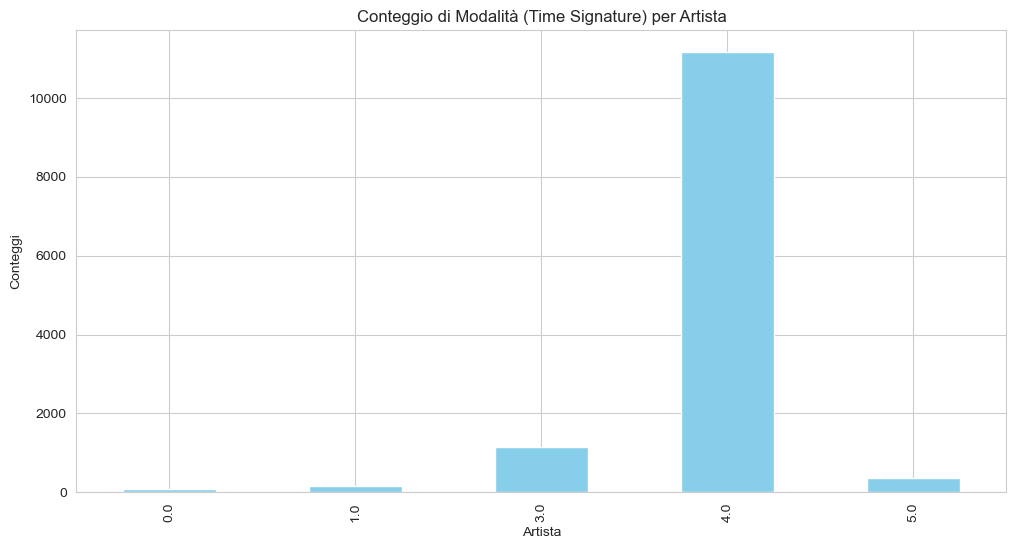

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ciascun artista
plt.figure(figsize=(12, 6))
conteggio_time_signature_per_artisti.plot(kind='bar', color='skyblue')
plt.xlabel('Artista')
plt.ylabel('Conteggi')
plt.title('Conteggio di Modalità (Time Signature) per Artista')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Conta il numero di valori per ciascuna modalità in ogni colonna della tabella time_signature_album_name
conteggio_time_signature_per_album = time_signature_album_name.sum()

# Visualizza il conteggio
print(conteggio_time_signature_per_album)


time_signature
0.0       92
1.0      149
3.0     1162
4.0    11160
5.0      375
dtype: int64


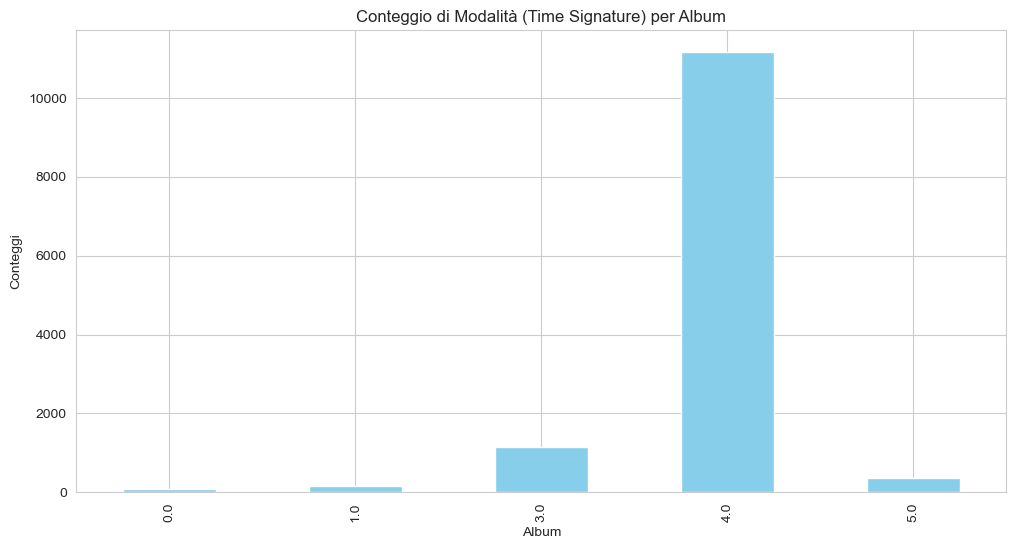

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ciascun album
plt.figure(figsize=(12, 6))
conteggio_time_signature_per_album.plot(kind='bar', color='skyblue')
plt.xlabel('Album')
plt.ylabel('Conteggi')
plt.title('Conteggio di Modalità (Time Signature) per Album')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Conta il numero di valori per ciascuna modalità in ogni colonna della tabella time_signature_genre
conteggio_time_signature_per_genere = time_signature_genre.sum()

# Visualizza il conteggio
print(conteggio_time_signature_per_genere)


time_signature
0.0       92
1.0      149
3.0     1162
4.0    11160
5.0      375
dtype: int64


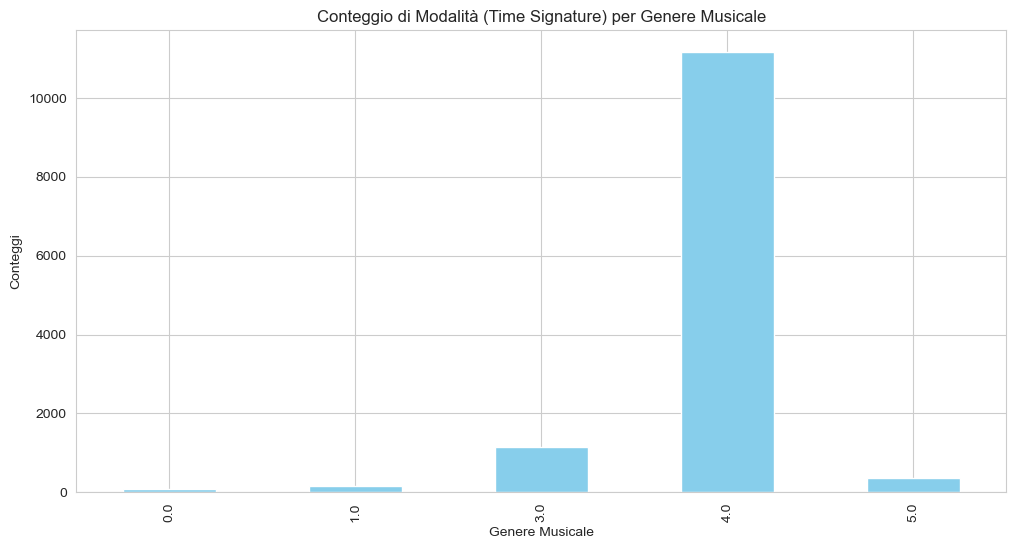

In [ ]:
import matplotlib.pyplot as plt

# Creare un grafico a barre dei conteggi per ciascun genere musicale
plt.figure(figsize=(12, 6))
conteggio_time_signature_per_genere.plot(kind='bar', color='skyblue')
plt.xlabel('Genere Musicale')
plt.ylabel('Conteggi')
plt.title('Conteggio di Modalità (Time Signature) per Genere Musicale')
plt.xticks(rotation=90)
plt.show()


In [ ]:
columns = df.columns

columns2 = set(columns)-set(variabili_categoriche)


## 1.3 Assessing data quality (missing values, outliers)

1.3.1 Missing values

In [ ]:
# Verifica la presenza di valori nulli o mancanti
valori_mancanti = df.isnull().sum()
print("Valori Mancanti per ogni colonna:")
print(valori_mancanti)

# Verifica la presenza di valori duplicati
duplicati = df.duplicated().sum()
print("\nNumero di righe duplicate nel dataset:", duplicati)

# Controlla statistiche descrittive delle colonne numeriche
descrizione_statistica = df.describe()
print("\nStatistiche descrittive delle colonne numeriche:")
print(descrizione_statistica)

# Verifica valori unici nelle colonne categoriche
colonne_categoriche = df.select_dtypes(include=['object'])
for colonna in colonne_categoriche:
    valori_unici = df[colonna].unique()
    print(f"\nValori unici nella colonna '{colonna}':")
    print(valori_unici)




Valori Mancanti per ogni colonna:
name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64

Numero di righe duplicate nel dataset: 0

Statistiche descrittive delle colonne numeriche:
        duration_ms    popularity  danceability        energy           key  \
count  1.500000e+04  15000.000000  150

In [ ]:
# Verifica la presenza di valori nulli o mancanti
valori_mancanti = df.isnull().sum().sum()

# Verifica la presenza di valori duplicati
duplicati = df.duplicated().sum()



# Definisci una variabile di risposta in base ai risultati dei controlli
risposta = "Nessun problema rilevato."

if valori_mancanti > 0:
    risposta = "Sono presenti valori mancanti nel dataset."

if duplicati > 0:
    risposta = "Sono presenti valori duplicati nel dataset."

# Puoi aggiungere ulteriori condizioni o controlli in base alle tue esigenze

# Stampa la risposta
print("Are present errors, outliers, missing values, semantic inconsistencies, etc?")
print(risposta)



Are present errors, outliers, missing values, semantic inconsistencies, etc?
Sono presenti valori mancanti nel dataset.


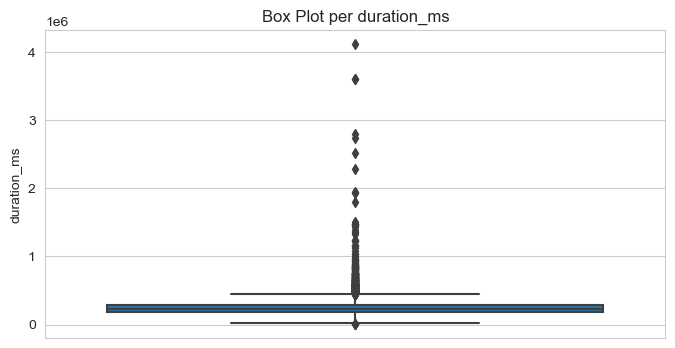

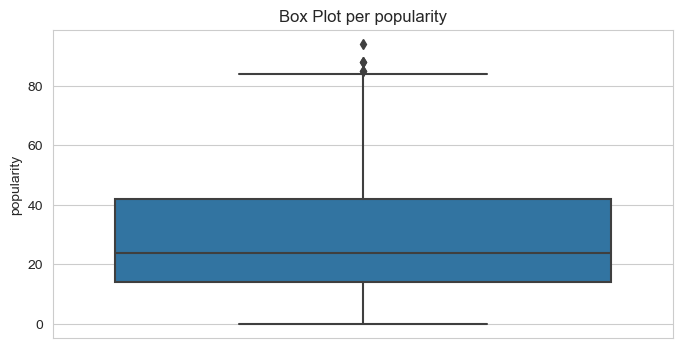

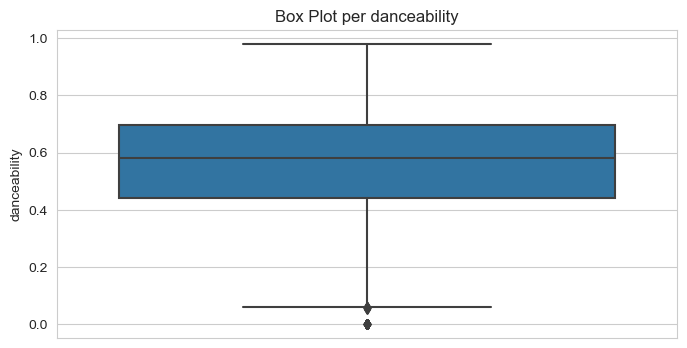

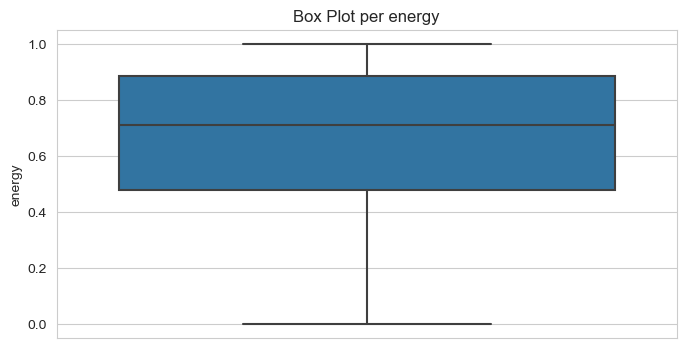

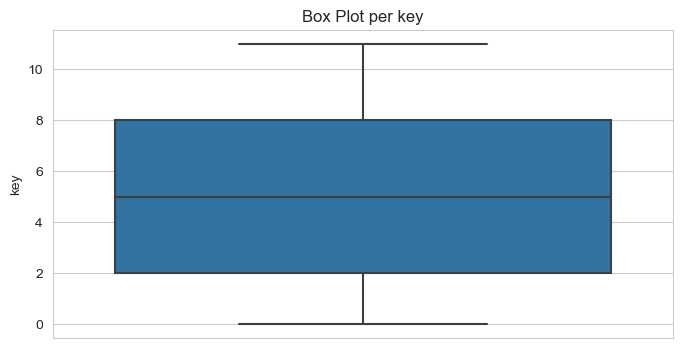

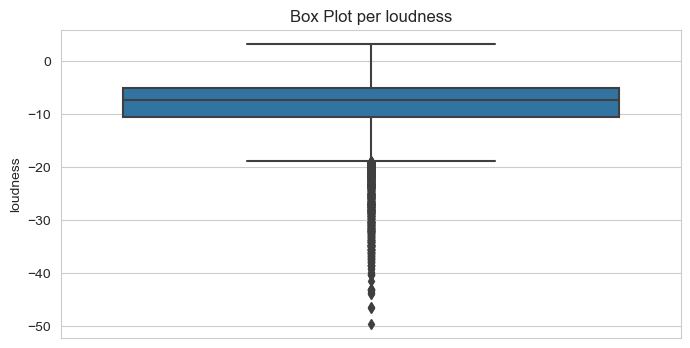

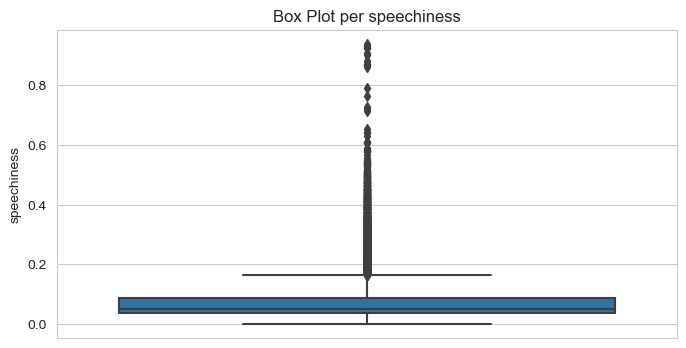

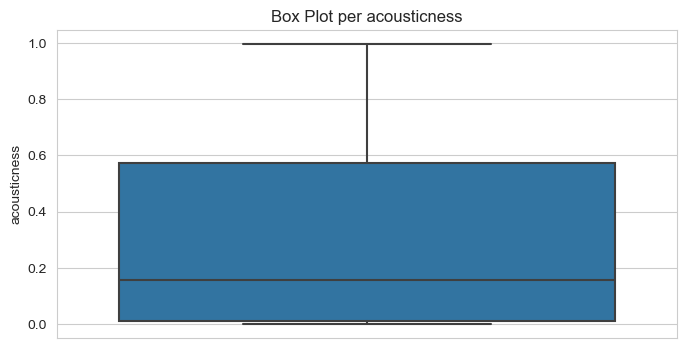

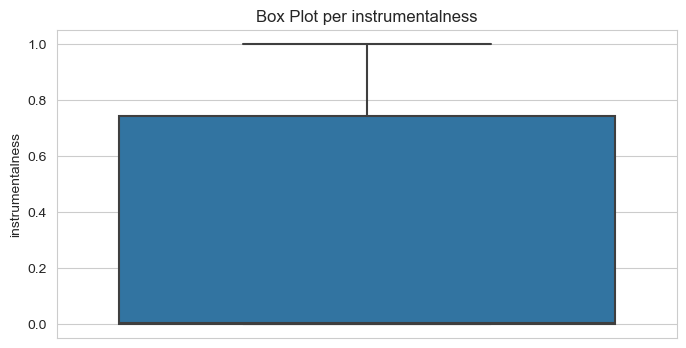

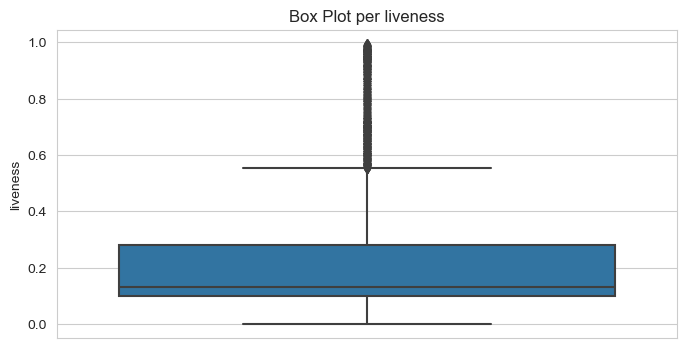

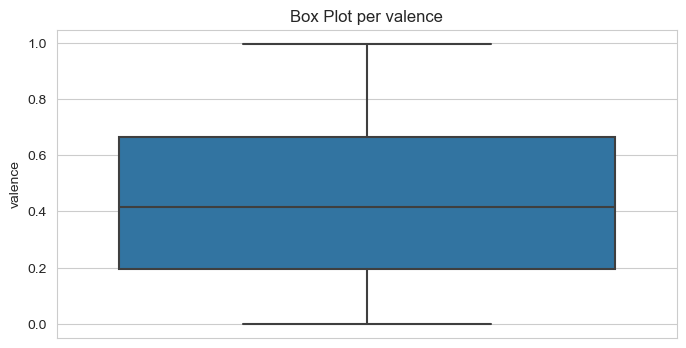

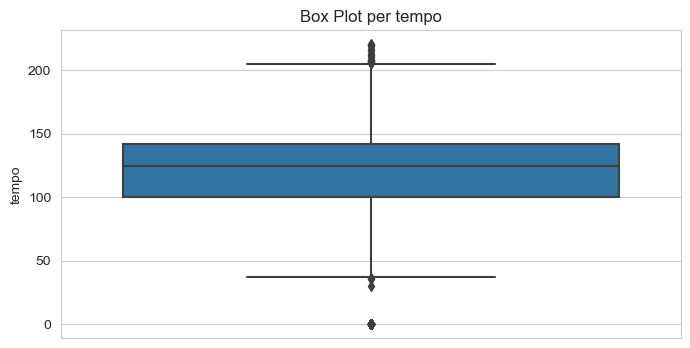

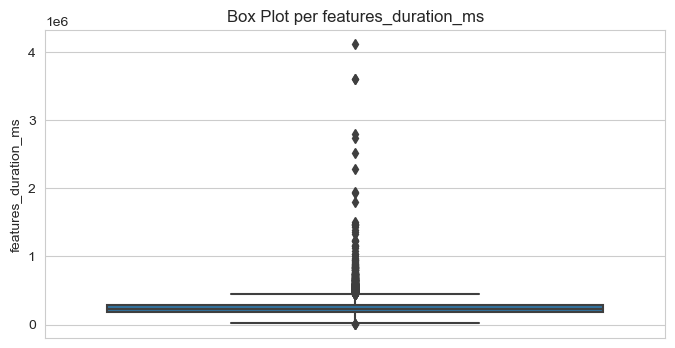

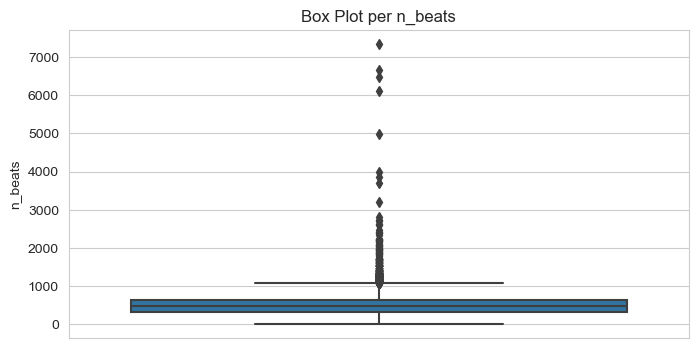

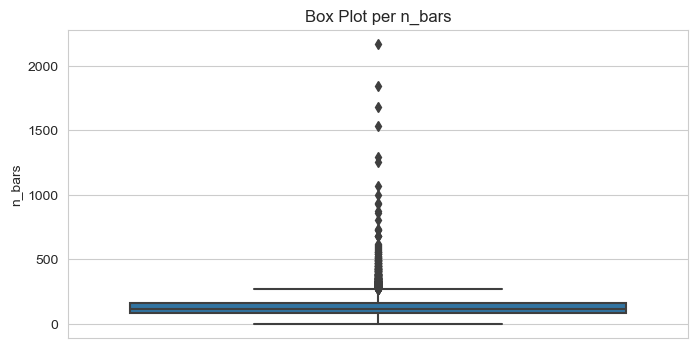

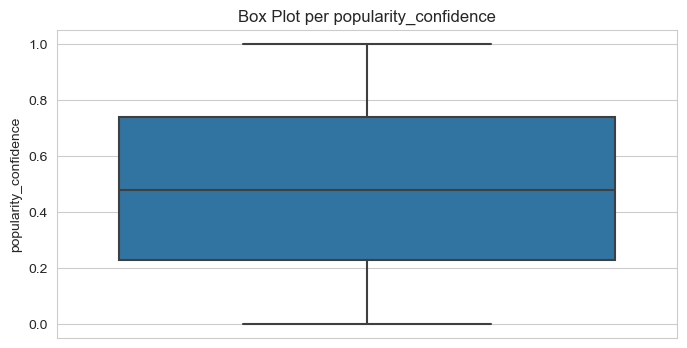

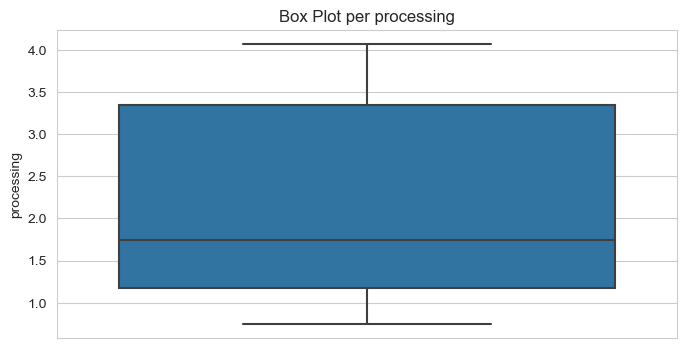

In [ ]:

# Seleziona le colonne continue in cui desideri identificare gli outlier
colonne_continue = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'features_duration_ms', 'n_beats', 'n_bars', 'popularity_confidence', 'processing']

# Crea un box plot per ciascuna colonna continua
for colonna in colonne_continue:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=colonna)
    plt.title(f'Box Plot per {colonna}')
    plt.show()


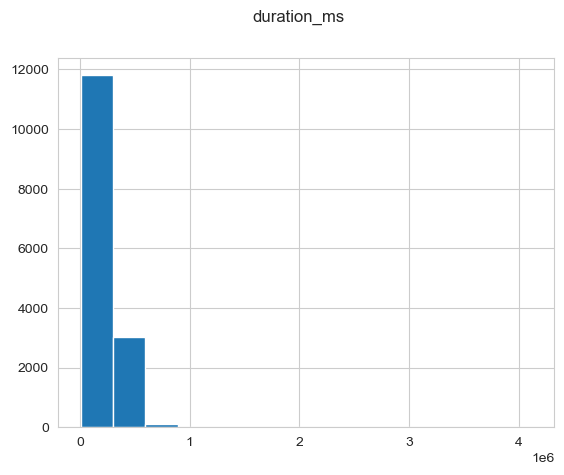

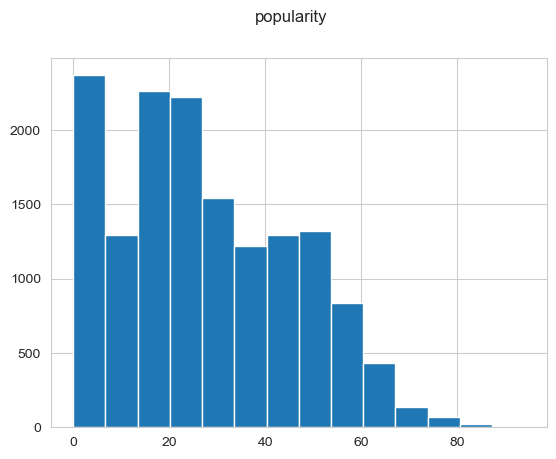

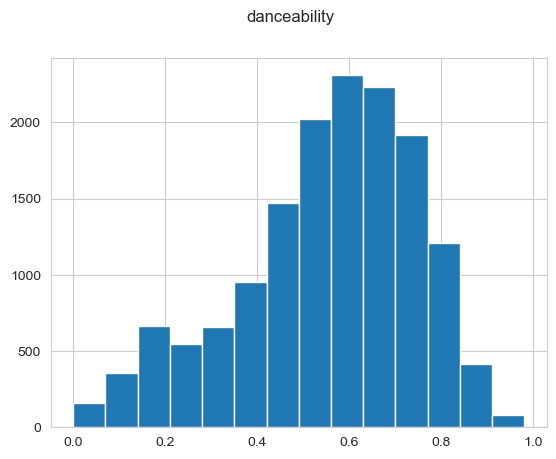

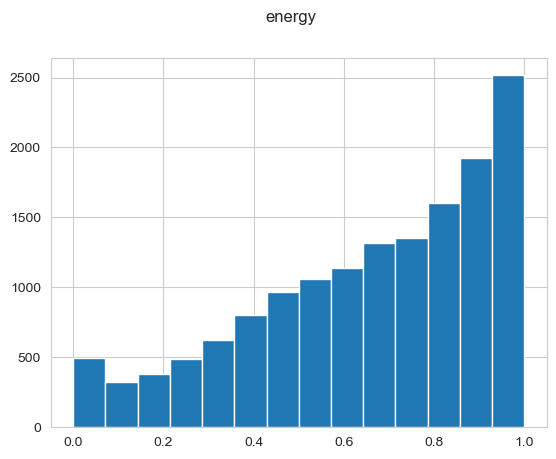

In [ ]:
n=len(df)
for column in variabili_continue:
    plt.figure()
    df[column].hist(bins=int(np.log2(n))+1)
    pl.suptitle(column)


In [ ]:

df.corr()

duration_ms  explicit  popularity  danceability  \
duration_ms               1.000000 -0.048723   -0.076202     -0.080932   
explicit                 -0.048723  1.000000   -0.013096      0.056992   
popularity               -0.076202 -0.013096    1.000000      0.051046   
danceability             -0.080932  0.056992    0.051046      1.000000   
energy                    0.102996  0.124405   -0.056547      0.193940   
key                       0.016712 -0.000991   -0.008992      0.035311   
loudness                  0.039403  0.131777    0.046703      0.385244   
mode                     -0.023310 -0.042846    0.073043     -0.072422   
speechiness              -0.074774  0.294287   -0.096382      0.111454   
acousticness             -0.184902 -0.113975    0.078424     -0.199082   
instrumentalness          0.079685 -0.125101   -0.266843     -0.202316   
liveness                 -0.021184  0.006995    0.027105     -0.174193   
valence                  -0.141938  0.008631    0.077652      0.559578   
tempo                     0.048765  0.016972   -0.024162      0.092267   
features_duration_ms      0.999918 -0.048699   -0.076228     -0.080891   
time_signature            0.009033  0.051260   -0.003160      0.292167   
n_beats                   0.839313 -0.039830   -0.084774     -0.033604   
n_bars                    0.838041 -0.039435   -0.089134     -0.069332   
popularity_confidence    -0.005830  0.029119   -0.003665      0.011602   
processing               -0.010400 -0.005878    0.008733     -0.026273   

                         energy       key  loudness      mode  speechiness  \
duration_ms            0.102996  0.016712  0.039403 -0.023310    -0.074774   
explicit               0.124405 -0.000991  0.131777 -0.042846     0.294287   
popularity            -0.056547 -0.008992  0.046703  0.073043    -0.096382   
danceability           0.193940  0.035311  0.385244 -0.072422     0.111454   
energy                 1.000000  0.057815  0.720907 -0.079969     0.143454   
key                    0.057815  1.000000  0.047718 -0.157515     0.018157   
loudness               0.720907  0.047718  1.000000 -0.033544     0.109793   
mode                  -0.079969 -0.157515 -0.033544  1.000000    -0.064289   
speechiness            0.143454  0.018157  0.109793 -0.064289     1.000000   
acousticness          -0.699454 -0.049867 -0.552519  0.085246    -0.087997   
instrumentalness      -0.203111 -0.001532 -0.447106 -0.080035    -0.115803   
liveness               0.191024 -0.007420  0.047502  0.015738     0.050034   
valence                0.284069  0.028221  0.377743 -0.006907     0.056068   
tempo                  0.331538  0.022414  0.308203 -0.013001     0.062161   
features_duration_ms   0.102985  0.016786  0.039415 -0.023409    -0.074722   
time_signature         0.204646  0.028388  0.250568 -0.019378     0.080739   
n_beats                0.243586  0.027133  0.165565 -0.030685    -0.043217   
n_bars                 0.208615  0.022042  0.131064 -0.027687    -0.040820   
popularity_confidence  0.040022  0.019790  0.049174  0.003698     0.026399   
processing            -0.037847 -0.490366 -0.020563  0.261129    -0.022909   

                       acousticness  instrumentalness  liveness   valence  \
duration_ms               -0.184902          0.079685 -0.021184 -0.141938   
explicit                  -0.113975         -0.125101  0.006995  0.008631   
popularity                 0.078424         -0.266843  0.027105  0.077652   
danceability              -0.199082         -0.202316 -0.174193  0.559578   
energy                    -0.699454         -0.203111  0.191024  0.284069   
key                       -0.049867         -0.001532 -0.007420  0.028221   
loudness                  -0.552519         -0.447106  0.047502  0.377743   
mode                       0.085246         -0.080035  0.015738 -0.006907   
speechiness               -0.087997         -0.115803  0.050034  0.056068   
acousticness               1.000000          0.094256 -0.07

[Text(0.5, 0, 'duration_ms'),
 Text(1.5, 0, 'explicit'),
 Text(2.5, 0, 'popularity'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'key'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'mode'),
 Text(8.5, 0, 'speechiness'),
 Text(9.5, 0, 'acousticness'),
 Text(10.5, 0, 'instrumentalness'),
 Text(11.5, 0, 'liveness'),
 Text(12.5, 0, 'valence'),
 Text(13.5, 0, 'tempo'),
 Text(14.5, 0, 'features_duration_ms'),
 Text(15.5, 0, 'time_signature'),
 Text(16.5, 0, 'n_beats'),
 Text(17.5, 0, 'n_bars'),
 Text(18.5, 0, 'popularity_confidence'),
 Text(19.5, 0, 'processing')]

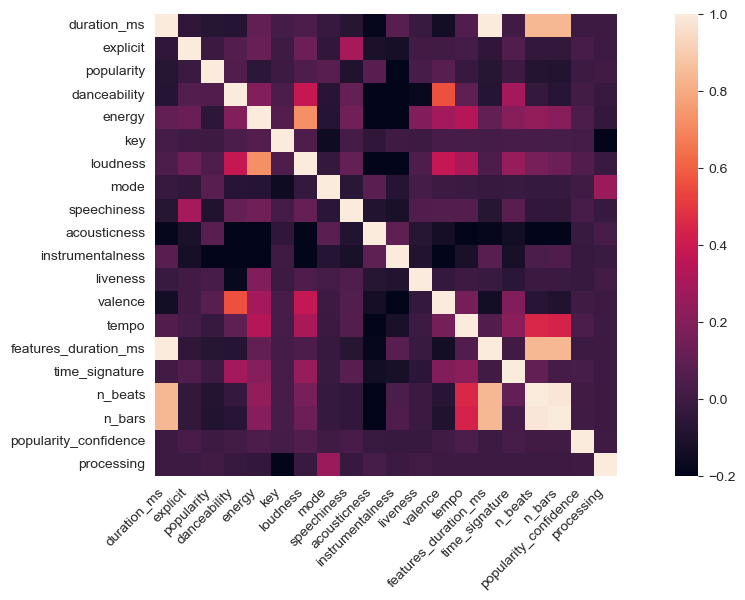

In [ ]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (15,6))
ax = sns.heatmap(corr, vmin=-0.2, vmax=1,square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [ ]:
df.corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

alta correlazione per


*   duration_ms e features_duration_ms con 0.99
*   n_beats con duration_ms con 0.88
*   n_bars con duration_ms con 0.87
*   n_beats con features_duration_ms 0.88
*   n_bars con features_duration_ms con 0.87







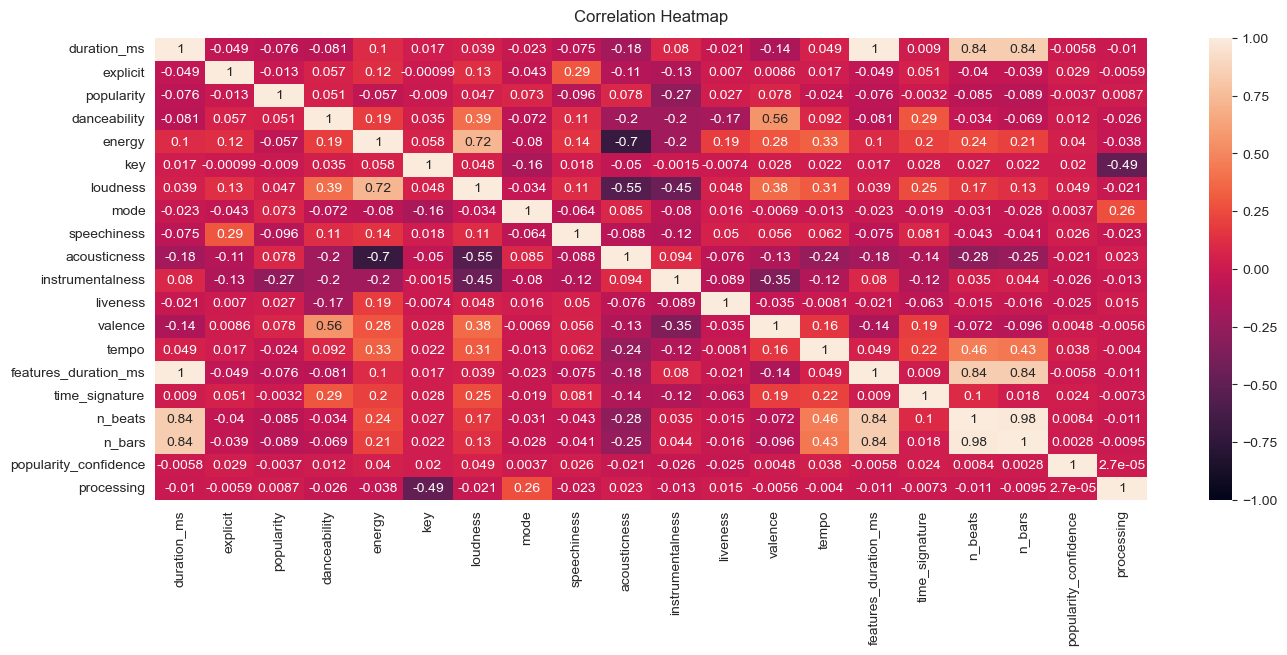

In [ ]:

# Crea la figura e il grafico
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

# Mostra il grafico
plt.show()


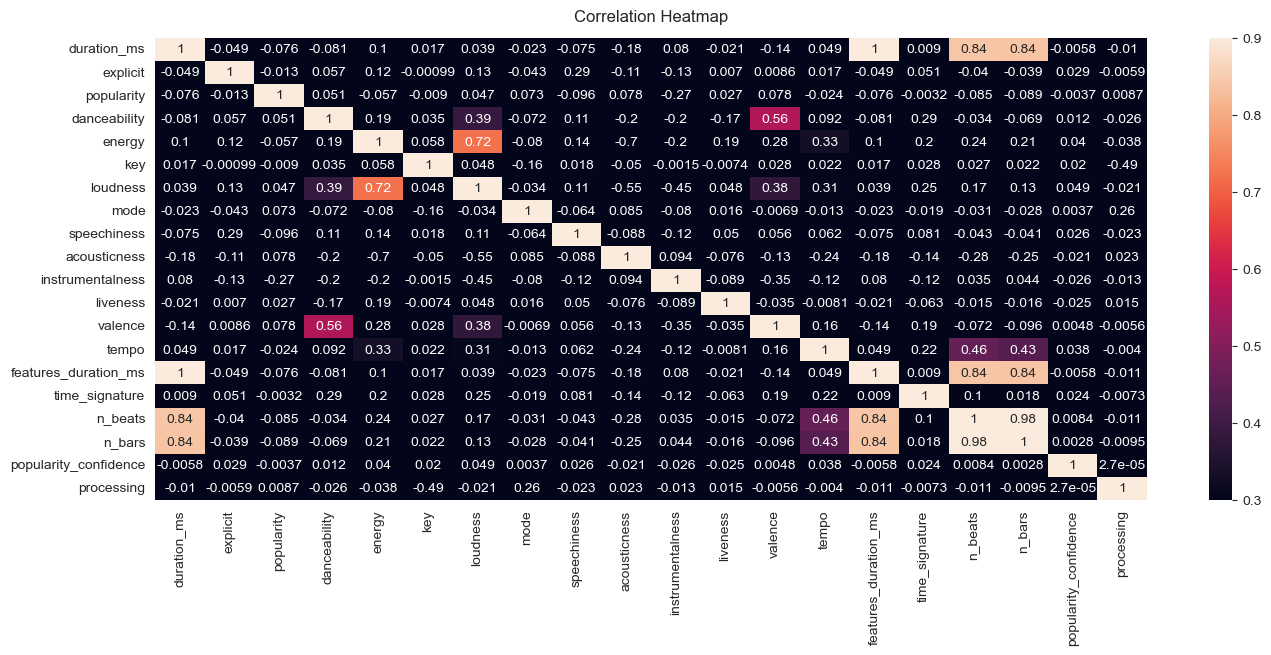

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea la figura e il grafico
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=0.30, vmax=0.90, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

# Mostra il grafico
plt.show()


esploro le variabili  'loudness', 'n_beats', 'n_bars' e 'time_signature'

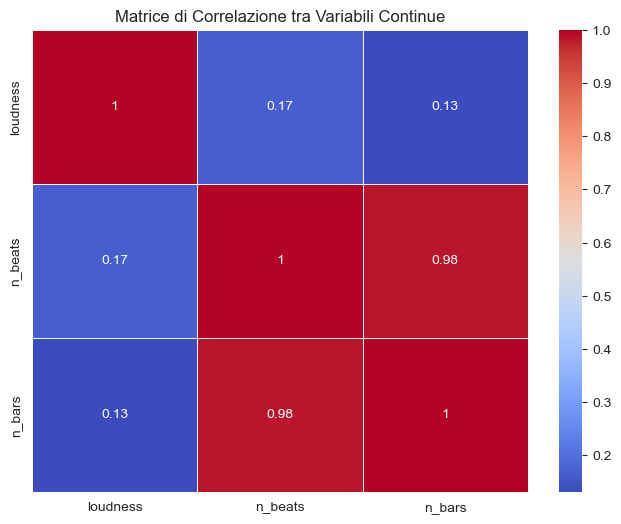

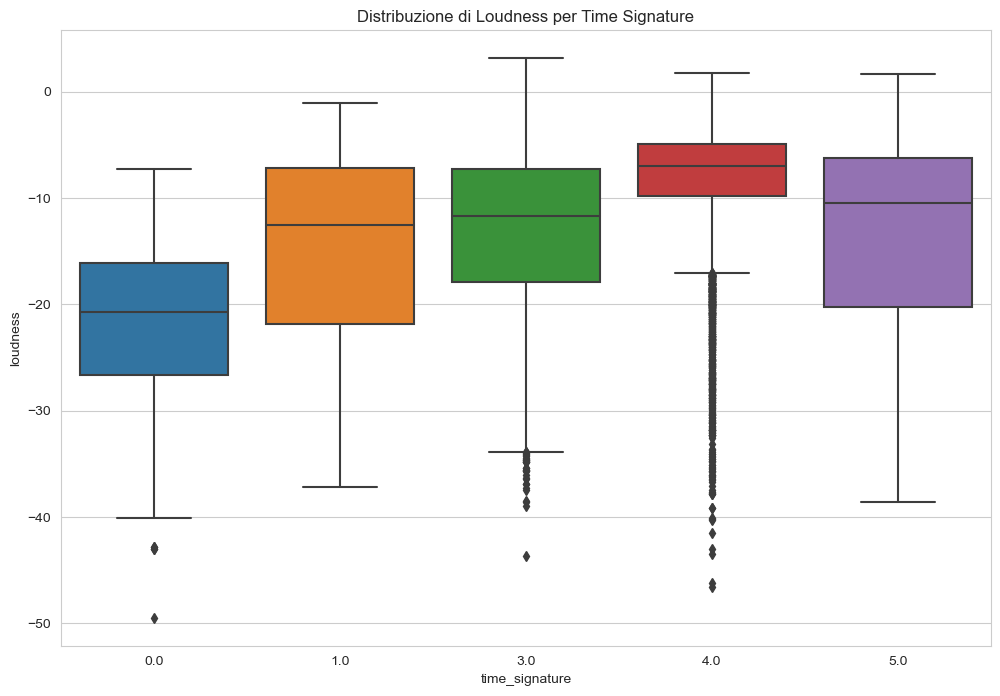

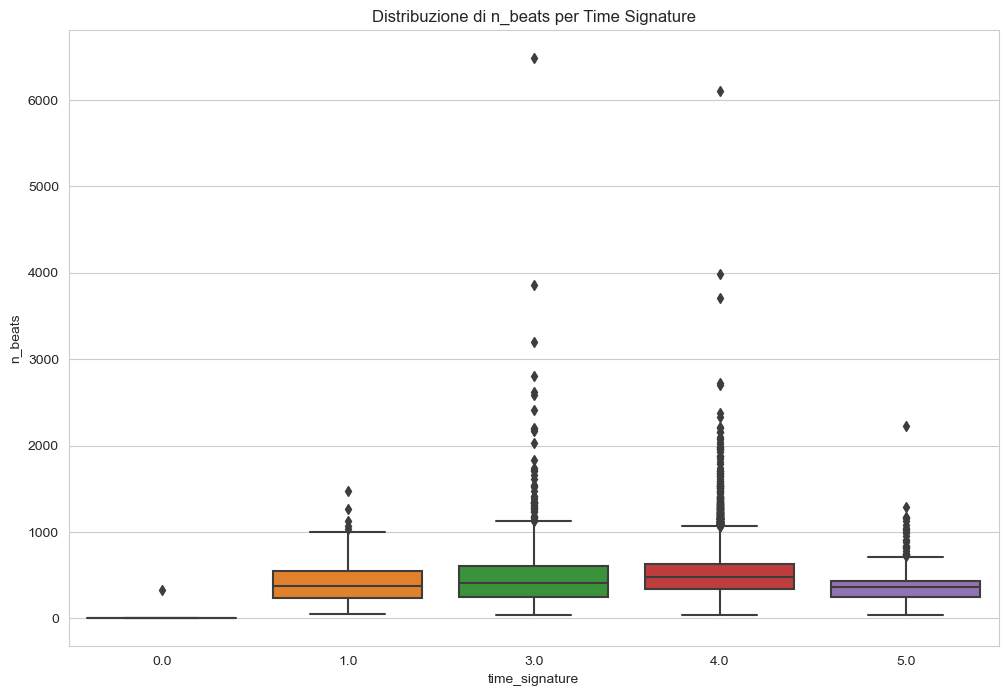

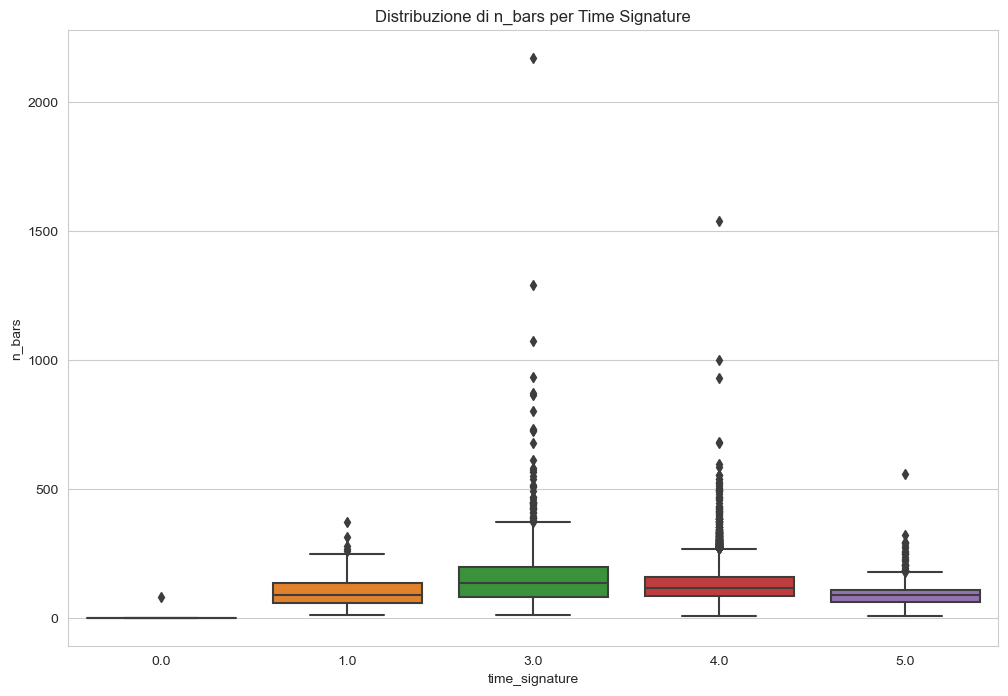

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il tuo dataset in un DataFrame
# Supponiamo che il tuo DataFrame sia chiamato 'df'

# Esplora la correlazione tra le variabili continue
correlation_matrix = df[['loudness', 'n_beats', 'n_bars']].corr()

# Visualizza una heatmap della matrice di correlazione
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice di Correlazione tra Variabili Continue')
plt.show()

# Esplora la relazione tra la variabile discreta 'time_signature' e le variabili continue
plt.figure(figsize=(12, 8))

# Box plot per visualizzare le distribuzioni di 'loudness' in base a 'time_signature'
sns.boxplot(x='time_signature', y='loudness', data=df)
plt.title('Distribuzione di Loudness per Time Signature')
plt.show()

# Box plot per visualizzare le distribuzioni di 'n_beats' in base a 'time_signature'
plt.figure(figsize=(12, 8))
sns.boxplot(x='time_signature', y='n_beats', data=df)
plt.title('Distribuzione di n_beats per Time Signature')
plt.show()

# Box plot per visualizzare le distribuzioni di 'n_bars' in base a 'time_signature'
plt.figure(figsize=(12, 8))
sns.boxplot(x='time_signature', y='n_bars', data=df)
plt.title('Distribuzione di n_bars per Time Signature')
plt.show()


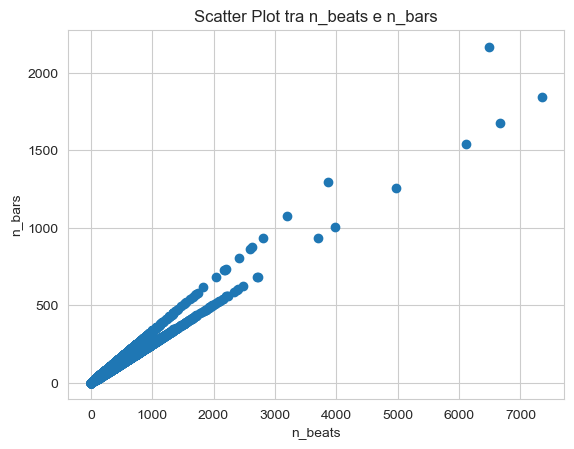

In [ ]:
plt.scatter(df['n_beats'], df['n_bars'])
plt.xlabel('n_beats')
plt.ylabel('n_bars')
plt.title('Scatter Plot tra n_beats e n_bars')
plt.show()


In [ ]:
correlation = df['n_beats'].corr(df['n_bars'])
print(f"Correlazione tra n_beats e n_bars: {correlation}")


Correlazione tra n_beats e n_bars: 0.9836958476657183


In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['n_beats']]
y = df['n_bars']

regressor = LinearRegression()
regressor.fit(X, y)

# Coefficienti della regressione
print(f"Coefficiente angolare (pendenza): {regressor.coef_}")
print(f"Intercetta: {regressor.intercept_}")


Coefficiente angolare (pendenza): [0.26324163]
Intercetta: -3.717657971277447


## calcolo per moda media mediana e moda per sostituire i missing


In [ ]:
import pandas as pd

# Supponiamo che il tuo DataFrame sia chiamato 'df'
# Calcola la media della colonna 'mode'
media = df['mode'].mean()

# Calcola la mediana della colonna 'mode'
mediana = df['mode'].median()

# Calcola la moda della colonna 'mode'
moda = df['mode'].mode()

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda.values.tolist()}")  # La moda potrebbe avere più di un valore


Media: 0.7407333333333334
Mediana: 1.0
Moda: [1.0]


In [ ]:
missing_mode_data = df[df['mode'].isnull()]
# Analizza il DataFrame missing_mode_data
print(missing_mode_data)

Empty DataFrame
Columns: [name, duration_ms, explicit, popularity, artists, album_name, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, features_duration_ms, time_signature, n_beats, n_bars, popularity_confidence, processing, genre]
Index: []

[0 rows x 24 columns]


In [ ]:
correlation_matrix = missing_mode_data.corr()
mode_correlation = correlation_matrix['mode'].sort_values(ascending=False)
print(mode_correlation)

duration_ms             NaN
explicit                NaN
popularity              NaN
danceability            NaN
energy                  NaN
key                     NaN
loudness                NaN
mode                    NaN
speechiness             NaN
acousticness            NaN
instrumentalness        NaN
liveness                NaN
valence                 NaN
tempo                   NaN
features_duration_ms    NaN
time_signature          NaN
n_beats                 NaN
n_bars                  NaN
popularity_confidence   NaN
processing              NaN
Name: mode, dtype: float64


In [ ]:
import pandas as pd

# Supponiamo che il tuo DataFrame sia chiamato 'df'

# Lista delle colonne da eliminare
colonne_da_elim = ['mode_filled_with_mean', 'mode_filled_with_median', 'mode_filled_with_mode']

# Elimina le colonne specificate
df.drop(columns=colonne_da_elim, inplace=True)


KeyError: "['mode_filled_with_mean', 'mode_filled_with_median', 'mode_filled_with_mode'] not found in axis"

In [ ]:
df

name  duration_ms  \
0                                              Long Road       241760   
1                   Daniâl My Son, Where Did You Vanish?       444000   
2                                     Ondskapens Galakse       333506   
3                                        Can't Look Away       269800   
4                                          Thunderground       307651   
...                                                  ...          ...   
14995                                              Outpt       432026   
14996  Natural Environment Sounds: To Improve Sleep a...       182746   
14997                               Psychological Attack       400091   
14998             Don't Hate The 808 (feat. Lafa Taylor)       197250   
14999                                    Parchaiyon Mein       198409   

       explicit  popularity                         artists  \
0         False          46                   Funki Porcini   
1         False           0                   Siavash Amini   
2         False           3                       Kvelertak   
3         False          23               The Wood Brothers   
4         False          25          The Darkraver;DJ Vince   
...         ...         ...                             ...   
14995     False           0                        Autechre   
14996     False          44  Natural White Noise Relaxation   
14997     False          43                         Droplex   
14998     False          37          Bassnectar;Lafa Taylor   
14999     False          36                   Ashwin Adwani   

                                              album_name  danceability  \
0                                          Hed Phone Sex         0.690   
1                                   A Trail of Laughters         0.069   
2                                             Nattesferd         0.363   
3                                      One Drop of Truth         0.523   
4                                 Happy Hardcore Top 100         0.643   
...                                                  ...           ...   
14995                                                EP7         0.554   
14996  Baby Sleep White Noise: Ultimate Album to Help...         0.103   
14997                               Psychological Attack         0.799   
14998                                    Noise vs Beauty         0.511   
14999                                    Parchaiyon Mein         0.678   

       energy  key  loudness  ...  liveness  valence    tempo  \
0       0.513    5   -12.529  ...    0.2810   0.6350  142.221   
1       0.196    1   -24.801  ...    0.3600   0.0336   75.596   
2       0.854    2    -7.445  ...    0.2620   0.4890  116.628   
3       0.585    5    -5.607  ...    0.1170   0.3850  140.880   
4       0.687    7   -11.340  ...    0.2990   0.6370  143.956   
...       ...  ...       ...  ...       ...      ...      ...   
14995   0.657    1   -14.232  ...    0.1320   0.0335  117.319   
14996   0.860    1   -19.627  ...    0.1230   0.0016   92.323   
14997   0.535    1    -9.103  ...    0.0713   0.0708  126.000   
14998   0.970    5    -2.299  ...    0.4020   0.2700  160.044   
14999   0.518    6    -7.790  ...    0.0880   0.7840   88.003   

       features_duration_ms  time_signature  n_beats  n_bars  \
0                    241760             4.0    567.0   141.0   
1                    444000             4.0    617.0   155.0   
2                    333507             4.0    652.0   162.0   
3                    269800             4.0    619.0   155.0   
4                    307652             4.0    733.0   183.0   
...                     ...             ...      ...     ...   
14995                432027             NaN    837.0   212.0   
14996                182747             3.0    277.0    92.0   
14997                400091             4.0    837.0   209.0   
14998                197250             4.0    513.0   130.0   
14999                198409             4.0 

In [ ]:
print('Types of columns\n', df.dtypes)
print('\nNumber of columns', len(df.columns))
print('\nCount of column types\n', df.dtypes.value_counts())
print('\nAll values\n', df.count())
print('\nNull values for columns\n', df.isna().sum())

Types of columns
 name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

Number of columns 24

Count of column types
 float64    15
object      4
int64       4
bool        1
dtype: int64

All values
 name                     15000
duration_ms      

In [ ]:
print('Types of columns\n', df.dtypes)
print('\nNumber of columns', len(df.columns))
print('\nCount of column types\n', df.dtypes.value_counts())
print('\nAll values\n', df.count())
print('\nNull values for columns\n', df.isna().sum())

Types of columns
 name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

Number of columns 24

Count of column types
 float64    15
object      4
int64       4
bool        1
dtype: int64

All values
 name                     15000
duration_ms      

In [ ]:
missing_time_signature_data = df[df['time_signature'].isnull()]
# Analizza il DataFrame missing_mode_data
print(missing_time_signature_data)

                                                    name  duration_ms  \
8      Shhhh Baby Shusher Mama Shushing Background Fa...       116815   
15                                              Escalate       220666   
20                                              Beqaaboo       187266   
23                                            Ukon Laulu       252556   
26                                        Soim In Vazduh       417025   
...                                                  ...          ...   
14981                                              ロケンロー       254887   
14984                                Deva Deva (Kannada)       276964   
14985                                              Fudge       129882   
14991                                Nuh Frighten Fi Ntn       237270   
14995                                              Outpt       432026   

       explicit  popularity                                          artists  \
8         False          45        Baby Sle

In [ ]:
correlation_matrix = missing_time_signature_data.corr()
time_signature_correlation = correlation_matrix['time_signature'].sort_values(ascending=False)
print(time_signature_correlation)

duration_ms             NaN
explicit                NaN
popularity              NaN
danceability            NaN
energy                  NaN
key                     NaN
loudness                NaN
mode                    NaN
speechiness             NaN
acousticness            NaN
instrumentalness        NaN
liveness                NaN
valence                 NaN
tempo                   NaN
features_duration_ms    NaN
time_signature          NaN
n_beats                 NaN
n_bars                  NaN
popularity_confidence   NaN
processing              NaN
Name: time_signature, dtype: float64


In [ ]:
import pandas as pd

# Supponiamo che il tuo DataFrame sia chiamato 'df'

# Calcola la moda della colonna 'time_signature'
moda_time_signature = df['time_signature'].mode()[0]  # Ottieni il primo valore della moda

# Sostituisci i valori mancanti con la moda
df['time_signature'].fillna(moda_time_signature, inplace=True)

In [ ]:
import pandas as pd

# Supponiamo che il tuo DataFrame sia chiamato 'df'

# Calcola la moda della colonna 'time_signature'
moda_time_signature = df['time_signature'].mode()[0]  # Ottieni il primo valore della moda

# Sostituisci i valori mancanti con la moda
df['time_signature'].fillna(moda_time_signature, inplace=True)

In [ ]:
import pandas as pd

# Assume che 'df' sia il tuo DataFrame
# Prima di eseguire l'imputazione, verifica la distribuzione di 'popularity_confidence'
print("Distribuzione originale di popularity_confidence:")
print(df['popularity_confidence'].describe())

# Tratta i valori mancanti come un genere separato (ad esempio, 'Unknown')
df['genre'].fillna('Unknown', inplace=True)

# Calcola la media della colonna 'popularity_confidence' raggruppata per genere
mean_popularity_confidence_by_genre = df.groupby('genre')['popularity_confidence'].mean()

# Funzione per l'imputazione basata sulla media di 'popularity_confidence' per ogni genere
def impute_popularity_confidence(row):
    genre = row['genre']
    if pd.isnull(row['popularity_confidence']):
        return mean_popularity_confidence_by_genre[genre]
    else:
        return row['popularity_confidence']

# Applica la funzione di imputazione
df['popularity_confidence'] = df.apply(impute_popularity_confidence, axis=1)

# Verifica la distribuzione dopo l'imputazione
print("\nDistribuzione di popularity_confidence dopo l'imputazione:")
print(df['popularity_confidence'].describe())

Distribuzione originale di popularity_confidence:
count    2217.000000
mean        0.490479
std         0.291330
min         0.000000
25%         0.230000
50%         0.480000
75%         0.739000
max         1.000000
Name: popularity_confidence, dtype: float64

Distribuzione di popularity_confidence dopo l'imputazione:
count    15000.000000
mean         0.489697
std          0.115221
min          0.000000
25%          0.458902
50%          0.486670
75%          0.512413
max          1.000000
Name: popularity_confidence, dtype: float64


In [ ]:
print('Types of columns\n', df.dtypes)
print('\nNumber of columns', len(df.columns))
print('\nCount of column types\n', df.dtypes.value_counts())
print('\nAll values\n', df.count())
print('\nNull values for columns\n', df.isna().sum())

Types of columns
 name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

Number of columns 24

Count of column types
 float64    15
object      4
int64       4
bool        1
dtype: int64

All values
 name                     15000
duration_ms      

In [ ]:

df.to_csv('no_ms_train.csv', index=False)

file_path = 'no_ms_train.csv'

# Leggi il file CSV

df = pd.read_csv(file_path)

In [ ]:
###check ddegli outliers per colonne numeriche





import pandas as pd

# Supponiamo che il tuo DataFrame sia chiamato 'df'

# Seleziona solo le colonne numeriche
colonnes_numeriche = df.select_dtypes(include=['float64', 'int64'])

# Applica il controllo degli outlier a tutte le colonne numeriche
for colonna in colonnes_numeriche.columns:
    dev_std = df[colonna].std()
    soglia = 3  # Puoi regolare questo valore a seconda del tuo dataset
    limit_superiore = df[colonna].mean() + (soglia * dev_std)
    limit_inferiore = df[colonna].mean() - (soglia * dev_std)

    # Trova gli outlier per ciascuna colonna numerica
    outlier = df[(df[colonna] > limit_superiore) | (df[colonna] < limit_inferiore)]
    print(f"Colonna: {colonna}")
    print(outlier)
    print("----------------------")


In [ ]:
###check per colonne categoriche


# Supponiamo che il tuo DataFrame sia chiamato 'df'
import pandas as pd

# Supponiamo che il tuo DataFrame sia chiamato 'df'
# Seleziona solo le colonne categoriche
colonnes_categoriche = df.select_dtypes(include=['object'])

# Analizza automaticamente le colonne categoriche
for colonna in colonnes_categoriche.columns:
    conteggio_valori = df[colonna].value_counts()
    valori_rari = conteggio_valori[conteggio_valori < 10]  # Sostituisci 10 con una soglia adeguata

    if not valori_rari.empty:
        print(f"Potenziali valori rari per la colonna '{colonna}':")
        print(valori_rari)
        print("---------------")
    else:
        print(f"Nessun potenziale valore raro per la colonna '{colonna}'")



In [ ]:
# Trova la riga con name = "have no fear" e artists = "bauri"
specific_row = df[(df['name'] == 'Have No Fear') & (df['artists'] == 'Bauri')]

# Stampare la riga trovata
print(specific_row)


               name  duration_ms  explicit  popularity artists  \
11087  Have No Fear       235000     False          12   Bauri   

                                          album_name  danceability  energy  \
11087  Still In My Arms: Compiled by Bayu and Moopie         0.487   0.388   

       key  loudness  ...  liveness  valence    tempo  features_duration_ms  \
11087    6    -14.58  ...    0.0868    0.135  126.654                235000   

       time_signature  n_beats  n_bars  popularity_confidence  processing  \
11087             5.0    464.0   117.0               0.517226    1.170953   

       genre  
11087    idm  

[1 rows x 24 columns]


In [ ]:
# Filtra i dati per 'speechiness' compresi tra 0.2 e 0.8
filtered_data = df[(df['speechiness'] >= 0.2) & (df['speechiness'] <= 0.8)]

# Conta il numero di canzoni per genere
count_by_genre = filtered_data['genre'].value_counts()

# Stampa i risultati
print("Numero di canzoni per genere con 'speechiness' tra 0.2 e 0.8:")
print(count_by_genre)

Numero di canzoni per genere con 'speechiness' tra 0.2 e 0.8:
j-dance          372
brazil           115
happy            100
spanish           93
study             87
iranian           65
breakbeat         64
industrial        56
afrobeat          55
disney            53
idm               49
indian            40
techno            32
black-metal       30
chicago-house     26
j-idol            20
sleep             19
forro             11
bluegrass          9
mandopop           4
Name: genre, dtype: int64


In [ ]:
## brrazil 11
##spanish 2
##iranian 30
##break bit 9
## afrobeat 6
##industrial 3
#idm 12
#indian 6
#tecno 1
#black mertal 29
#chicago house 11
#j-idol 1
#sleep 6
#forro 2
#blue grass 6

#abbiamo eliminato le righe con media di olrtre 10 minuti in più rispetto al genere

laudness
##features_duration_ms  siccome è uguale a duration_ms si droppa quello con valore medio, massimo e minimo più alto quindi features_duration_ms
n-beats
n-bars()

In [ ]:
print('Types of columns\n', df.dtypes)
print('\nNumber of columns', len(df.columns))
print('\nCount of column types\n', df.dtypes.value_counts())
print('\nAll values\n', df.count())
print('\nNull values for columns\n', df.isna().sum())

Types of columns
 name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

Number of columns 24

Count of column types
 float64    15
object      4
int64       4
bool        1
dtype: int64

All values
 name                     15000
duration_ms      

In [ ]:



# Calcolo della media di duration_ms per ciascun genre
mean_duration_by_genre = df.groupby('genre')['duration_ms'].mean()

# Stampare la media di duration_ms per ciascun genre
print("Media di duration_ms per ciascun genre:")
min = mean_duration_by_genre/60000
print(min)


In [ ]:
162, 6313, 8897, 6013, 6096, 375, 1948, 4293, 6014, 6207, 8024, 9693, 12362, 12379, 12843, 13870, 13991, 14041, 3288,7341,8752, 9383, 12898, 8698, 3531, 2420, 5057, 8019, 8153, 2057, 6203, 6269, 11370, 12163, 12868, 1376, 6401, 8580, 12135, 9627, 6974

In [ ]:
# Visualizza l'elemento all'indice 16
elemento_indice_16 = df.iloc[16]
print(elemento_indice_16)

In [ ]:
outlier_threshold = 3.0
generi = ['j-dance','brazil','happy','spanish','study','iranian','breakbeat','disney','afrobeat','industrial','idm','indian','techno','black-metal','chicago-house','j-idol','sleep','forro','bluegrass','mandopop']
#col = ['speechiness','loudness','duration_ms','features_duration_ms','n_bars','n_beats']
col = ['duration_ms']
for test in col:
    for genre in generi:
        if df[test].dtype != 'object':  # Ignora le colonne non numeriche
                q1 = df[test].quantile(0.25)
                q3 = df[test].quantile(0.75)
                iqr = q3 - q1
                lower_bound = q1 - outlier_threshold * iqr
                upper_bound = q3 + outlier_threshold * iqr

                outliers = df[(df[test] < lower_bound) | (df[test] > upper_bound) & (df['genre']==genre)][[test,'genre']]
                testo_grande = "\033[1;33;40m" + "Outliers nella colonna:"+ test + "\033[m"
                print(testo_grande)
                somma_per_genere = outliers.min()
                somma_per_genere2 = outliers.max()
                somma_per_genere3 = df[df['genre']==genre].mean()

                ris = outliers[col]-int(somma_per_genere3[col])
                ris = ris/60000
                print(genre)
                min = outliers[col]/60000
                print(ris)



                #somma = len(outliers)

                # Stampa i risultati
                #print(somma_per_genere)
                #print(somma_per_genere2)
                #print(somma_per_genere3)

                #print(somma)
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")

In [ ]:
outlier_threshold = 3.0
generi = ['j-dance','brazil','happy','spanish','study','iranian','breakbeat','disney','afrobeat','industrial','idm','indian','techno','black-metal','chicago-house','j-idol','sleep','forro','bluegrass','mandopop']
#col = ['speechiness','loudness','duration_ms','features_duration_ms','n_bars','n_beats']
col = ['loudness']
for test in col:
    for genre in generi:
        if df[test].dtype != 'object':  # Ignora le colonne non numeriche
                q1 = df[test].quantile(0.25)
                q3 = df[test].quantile(0.75)
                iqr = q3 - q1
                lower_bound = q1 - outlier_threshold * iqr
                upper_bound = q3 + outlier_threshold * iqr

                outliers = df[(df[test] < lower_bound) | (df[test] > upper_bound) & (df['genre']==genre)][[test,'genre']]
                testo_grande = "\033[1;33;40m" + "Outliers nella colonna:"+ test + "\033[m"
                print(testo_grande)
                somma_per_genere = outliers.min()
                somma_per_genere2 = outliers.max()
                #somma_per_genere3 = df[df['genre']==genre].mean()




                somma = len(outliers)

                # Stampa i risultati
                print(somma_per_genere)
                print(somma_per_genere2)
                #print(somma_per_genere3)

                print(somma)
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")

In [ ]:
outlier_threshold = 3.0
generi = ['j-dance','brazil','happy','spanish','study','iranian','breakbeat','disney','afrobeat','industrial','idm','indian','techno','black-metal','chicago-house','j-idol','sleep','forro','bluegrass','mandopop']
col = ['loudness']

for test in col:
    for genre in generi:
        if df[test].dtype != 'object':  # Ignora le colonne non numeriche
            q1 = df[df['genre']==genre][test].quantile(0.25)
            q3 = df[df['genre']==genre][test].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - outlier_threshold * iqr
            upper_bound = q3 + outlier_threshold * iqr

            outliers = df[(df[test] < lower_bound) | (df[test] > upper_bound) & (df['genre']==genre)][[test,'genre']]
            testo_grande = "\033[1;33;40m" + "Outliers nella colonna:"+ test + "\033[m"
            print(testo_grande)
            somma_per_genere = outliers.min()
            somma_per_genere2 = outliers.max()
            somma = len(outliers)

            # Stampa i risultati
            print(somma_per_genere)
            print(somma_per_genere2)
            print(somma)

    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")


In [ ]:
import pandas as pd
import numpy as np

outlier_threshold = 1.5  # Definisci la soglia per identificare gli outliers

# Gruppi per genere e identificazione degli outliers
outliers = df.groupby('genre').apply(lambda x: x[(np.abs(x['loudness'] - x['loudness'].mean()) > outlier_threshold * x['loudness'].std())])

print(len(outliers))


In [ ]:
outlier_threshold = 3.0
file_path = 'no_ms_train.csv'
outlier_indices = []  # Inizializza un array per memorizzare gli indici degli outliers

# Leggi il file CSV
df = pd.read_csv(file_path)
import warnings
# Ignora i FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
generi = ['j-dance','brazil','happy','spanish','study','iranian','breakbeat','disney','afrobeat','industrial','idm','indian','techno','black-metal','chicago-house','j-idol','sleep','forro','bluegrass','mandopop']
#col = ['speechiness','loudness','duration_ms','features_duration_ms','n_bars','n_beats','popularity_confidence']
#col = ['duration_ms','instrumentalness','processing', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'valence', 'tempo', 'features_duration_ms', 'n_beats', 'n_bars', 'popularity_confidence', 'processing']
col = ['loudness']
for test in col:
    for genre in generi:
        if df[test].dtype != 'object':  # Ignora le colonne non numeriche
            q1 = df[test].quantile(0.25)
            q3 = df[test].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - outlier_threshold * iqr
            upper_bound = q3 + outlier_threshold * iqr
            temp = df[df['genre']==genre]
            outliers = temp[(temp[test] < lower_bound) | (temp[test] > upper_bound)][[test,'genre']]
            for index, row in outliers.iterrows():
                if row[test] < 0:
                    outlier_indices.append(index)

            # outliers = df[(df[test] < lower_bound)  & (df['genre']==genre) | (df[test] > upper_bound) & (df['genre']==genre)][[test,'genre']]
            # print(outliers['genre'].value_counts())
            testo_grande = "\033[1;33;40m" + "Outliers nella colonna:"+ test + "\033[m"
            print(testo_grande)
            somma_per_genere = outliers.min()
            somma_per_genere2 = outliers.max()
            somma_per_genere3 = df[df['genre']==genre].mean()

            ris = outliers[test]-int(somma_per_genere3[test])
            #ris = ris/60000
            print(genre)
            #min = outliers[test]/60000
            print(ris)



            somma = len(outliers)

            # Stampa i risultati
            #print(somma_per_genere)
            #print(somma_per_genere2)
            #print(somma_per_genere3)
            print(somma)
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
print(outlier_indices)
print(len(outlier_indices))

Outliers nella colonna:loudness
j-dance
Series([], Name: loudness, dtype: float64)
0
Outliers nella colonna:loudness
brazil
5251   -21.693
Name: loudness, dtype: float64
1
Outliers nella colonna:loudness
happy
Series([], Name: loudness, dtype: float64)
0
Outliers nella colonna:loudness
spanish
Series([], Name: loudness, dtype: float64)
0
Outliers nella colonna:loudness
study
Series([], Name: loudness, dtype: float64)
0
Outliers nella colonna:loudness
iranian
618     -16.956
631     -19.641
2117    -18.873
2715    -18.182
2734    -15.496
3433    -20.625
3500    -18.930
3514    -17.705
3815    -16.775
3826    -17.631
4175    -23.648
5494    -16.194
5792    -15.960
5865    -18.880
6366    -18.401
6841    -15.515
7228    -16.518
7408    -15.630
7658    -15.685
8273    -16.202
8280    -19.525
8520    -19.953
8756    -15.855
9132    -15.440
9527    -19.652
10117   -17.299
10393   -26.409
10923   -25.780
11310   -20.630
11360   -19.984
11881   -18.390
11920   -15.429
11931   -17.714
13335   -

In [ ]:
outlier_threshold = 3.0
file_path = 'no_ms_train.csv'
outlier_indices = []  # Inizializza un array per memorizzare gli indici degli outliers

# Leggi il file CSV
df = pd.read_csv(file_path)
import warnings
# Ignora i FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
generi = ['j-dance','brazil','happy','spanish','study','iranian','breakbeat','disney','afrobeat','industrial','idm','indian','techno','black-metal','chicago-house','j-idol','sleep','forro','bluegrass','mandopop']
#col = ['speechiness','loudness','duration_ms','features_duration_ms','n_bars','n_beats','popularity_confidence']
#col = ['duration_ms','instrumentalness','processing', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'valence', 'tempo', 'features_duration_ms', 'n_beats', 'n_bars', 'popularity_confidence', 'processing']
col = ['loudness']
for test in col:
    for genre in generi:
        if df[test].dtype != 'object':  # Ignora le colonne non numeriche
            q1 = df[test].quantile(0.25)
            q3 = df[test].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - outlier_threshold * iqr
            upper_bound = q3 + outlier_threshold * iqr
            temp = df[df['genre'] == genre]
            outliers = temp[(temp[test] < lower_bound) | (temp[test] > upper_bound)][[test, 'genre']]

            # Filtra gli outliers con valore > 15
            outliers_gt_15 = outliers[outliers[test] > 15]

            if not outliers_gt_15.empty:  # Verifica se ci sono outliers > 15
                testo_grande = "\033[1;33;40m" + "Outliers nella colonna:" + test + "\033[m"
                print(testo_grande)
                print(genre)
                print(outliers_gt_15)

# outliers = df[(df[test] < lower_bound)  & (df['genre']==genre) | (df[test] > upper_bound) & (df['genre']==genre)][[test,'genre']]
            # print(outliers['genre'].value_counts())
            testo_grande = "\033[1;33;40m" + "Outliers nella colonna:"+ test + "\033[m"
            print(testo_grande)
            somma_per_genere = outliers.min()
            somma_per_genere2 = outliers.max()
            somma_per_genere3 = df[df['genre']==genre].mean()

            ris = outliers[test]-int(somma_per_genere3[test])
            #ris = ris/60000
            print(genre)
            #min = outliers[test]/60000
            print(ris)



            somma = len(outliers)

            # Stampa i risultati
            #print(somma_per_genere)
            #print(somma_per_genere2)
            #print(somma_per_genere3)
            print(somma)
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
print(outlier_indices)
print(len(outlier_indices))


SyntaxError: invalid syntax (2496929336.py, line 56)

In [ ]:
outlier_threshold = 3.0
outlier_indices = []  # Inizializza un array per memorizzare gli indici degli outliers

# Leggi il file CSV
import warnings
# Ignora i FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
generi = ['j-dance','brazil','happy','spanish','study','iranian','breakbeat','disney','afrobeat','industrial','idm','indian','techno','black-metal','chicago-house','j-idol','sleep','forro','bluegrass','mandopop']
#col = ['speechiness','loudness','duration_ms','features_duration_ms','n_bars','n_beats','popularity_confidence']
#col = ['duration_ms','instrumentalness','processing', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'valence', 'tempo', 'features_duration_ms', 'n_beats', 'n_bars', 'popularity_confidence', 'processing']
col = ['loudness']
for test in col:
    for genre in generi:
        if df[test].dtype != 'object':  # Ignora le colonne non numeriche
            q1 = df[test].quantile(0.25)
            q3 = df[test].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - outlier_threshold * iqr
            upper_bound = q3 + outlier_threshold * iqr

            temp = df[df['genre']==genre]
            outliers = temp[(temp[test] < lower_bound) | (temp[test] > upper_bound)][[test,'genre']]


            # outliers = df[(df[test] < lower_bound)  & (df['genre']==genre) | (df[test] > upper_bound) & (df['genre']==genre)][[test,'genre']]
            # print(outliers['genre'].value_counts())
            testo_grande = "\033[1;33;40m" + "Outliers nella colonna:"+ test + "\033[m"
            print(testo_grande)
            somma_per_genere = outliers.min()
            somma_per_genere2 = outliers.max()
            somma_per_genere3 = df[df['genre']==genre].mean()

            ris = outliers[test]-int(somma_per_genere3[test])
            #ris = ris/60000
            print(genre)
            #min = outliers[test]/60000
            #print(ris)
            ris_under_threshold = ris[ris < -7]
            print(ris_under_threshold)
            outlier_indices.extend(ris_under_threshold.index)
            print(len(ris_under_threshold))


            somma = len(outliers)

            # Stampa i risultati
            #print(somma_per_genere)
            #print(somma_per_genere2)
            #print(somma_per_genere3)

            #print(somma)
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
print(outlier_indices)
print(len(outlier_indices))


Outliers nella colonna:loudness
j-dance
Series([], Name: loudness, dtype: float64)
0
Outliers nella colonna:loudness
brazil
8425   -20.146
Name: loudness, dtype: float64
1
Outliers nella colonna:loudness
happy
Series([], Name: loudness, dtype: float64)
0
Outliers nella colonna:loudness
spanish
Series([], Name: loudness, dtype: float64)
0
Outliers nella colonna:loudness
study
Series([], Name: loudness, dtype: float64)
0
Outliers nella colonna:loudness
iranian
3383    -15.831
4344    -15.630
5849    -16.235
6923    -16.143
6945    -15.860
9702    -15.936
10481   -15.298
11343   -16.208
11965   -15.798
13194   -15.909
Name: loudness, dtype: float64
10
Outliers nella colonna:loudness
breakbeat
Series([], Name: loudness, dtype: float64)
0
Outliers nella colonna:loudness
disney
3346    -13.904
3732    -13.820
4407    -13.338
4490    -13.510
5585    -13.357
5947    -14.128
6126    -13.892
7784    -13.345
8077    -13.725
10677   -13.950
10863   -13.511
11674   -13.440
12006   -14.234
12399   -

In [ ]:
# Lista degli indici da eliminare
indici_da_eliminare = [5251, 618, 631, 2117, 2715, 2734, 3433, 3500, 3514, 3815, 3826, 4175, 5494, 5792, 5865, 6366, 6841, 7228, 7408, 7658, 8273, 8280, 8520, 8756, 9132, 9527, 10117, 10393, 10923, 11310, 11360, 11881, 11920, 11931, 13335, 13340, 13800, 14519, 101, 354, 579, 695, 1921, 2003, 2150, 2774, 3617, 3872, 4678, 5525, 6224, 6922, 7337, 7399, 7454, 7742, 8065, 8323, 9166, 9947, 10061, 10257, 10380, 10613, 10835, 12094, 12186, 12574, 12736, 13531, 14325, 197, 252, 895, 1918, 3580, 2828, 4439, 5071, 7430, 11109, 11819, 13857, 14099, 14745, 1323, 2096, 6129, 6800, 9584, 11256, 16, 61, 133, 203, 235, 338, 454, 565, 626, 640, 697, 770, 962, 1113, 1121, 1259, 1433, 1494, 1706, 1784, 1946, 1955, 2092, 2209, 2505, 2543, 2561, 2586, 2644, 2756, 2786, 3062, 3066, 3184, 3200, 3347, 3361, 3428, 3458, 3466, 3776, 3783, 3889, 3967, 4009, 4124, 4176, 4371, 4458, 4514, 4520, 4713, 4737, 4827, 4832, 4865, 4939, 4951, 5146, 5154, 5197, 5322, 5387, 5405, 5577, 5578, 5733, 5751, 5801, 5829, 5843, 5956, 6188, 6319, 6389, 6427, 6434, 6570, 6721, 6818, 6854, 6866, 7050, 7159, 7226, 7300, 7349, 7502, 7590, 7593, 7594, 7596, 7613, 7625, 7629, 7638, 7720, 7910, 7921, 7923, 7975, 8131, 8217, 8303, 8570, 8580, 8603, 8607, 8632, 8693, 8803, 8826, 8834, 8891, 8892, 8906, 8980, 9018, 9121, 9176, 9398, 9479, 9491, 9515, 9591, 9596, 9672, 9708, 9718, 9851, 9866, 9946, 10003, 10145, 10170, 10187, 10248, 10331, 10340, 10408, 10511, 10556, 10574, 10717, 10729, 10793, 10841, 11058, 11060, 11178, 11305, 11452, 11546, 11673, 11769, 11856, 11936, 11945, 11952, 12081, 12143, 12314, 12425, 12528, 12569, 12746, 12795, 12852, 12892, 13009, 13399, 13457, 13525, 13554, 13566, 13677, 13706, 13813, 13832, 13889, 13942, 13992, 14111, 14142, 14144, 14253, 14288, 14445, 14479, 14585, 14638, 14744, 14832, 14947, 3779, 8092, 13397, 5681, 7335, 14344]
# Elimina le righe con gli indici specificati
df = df[~df.index.isin(indici_da_eliminare)]

In [ ]:
len(df)

14709

In [ ]:
file_path = 'no_ms_train.csv'
df = pd.read_csv(file_path)
len(df)

15000

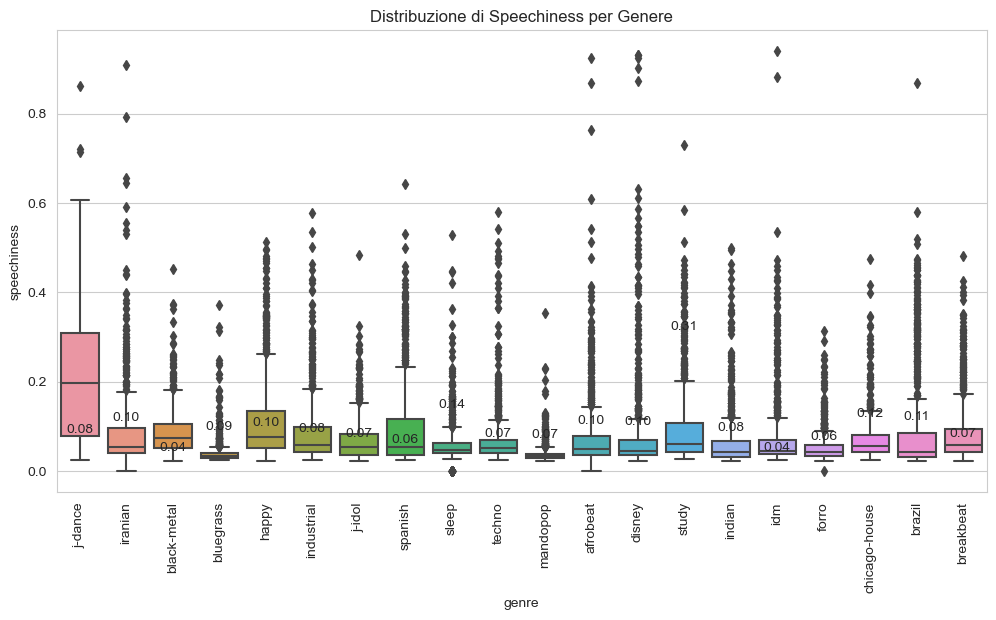

C:\Users\Alma\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alma\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alma\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alma\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alma\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.1% of the points cann

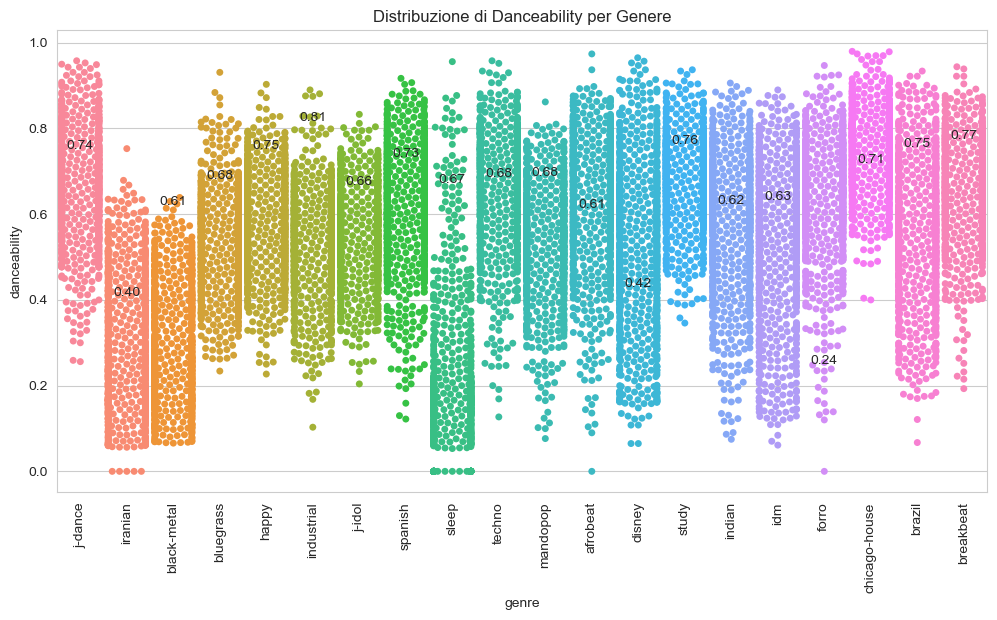

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati dal file CSV
df = pd.read_csv('no_ms_train.csv')

# Boxplot con il valore del baffo superiore (0.75)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='genre', y='speechiness')
plt.title('Distribuzione di Speechiness per Genere')
plt.xticks(rotation=90)

# Calcola e aggiungi il valore del baffo superiore (0.75) per ciascun genere
grouped_data = df.groupby('genre')['speechiness'].quantile(0.75).reset_index()
for i in range(len(grouped_data)):
    plt.text(i, grouped_data['speechiness'][i], f"{grouped_data['speechiness'][i]:.2f}", ha='center', va='bottom')

plt.show()

# Swarmplot con il valore del baffo superiore (0.75)
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='genre', y='danceability')
plt.title('Distribuzione di Danceability per Genere')
plt.xticks(rotation=90)

# Calcola e aggiungi il valore del baffo superiore (0.75) per ciascun genere
grouped_data = df.groupby('genre')['danceability'].quantile(0.75).reset_index()
for i in range(len(grouped_data)):
    plt.text(i, grouped_data['danceability'][i], f"{grouped_data['danceability'][i]:.2f}", ha='center', va='bottom')

plt.show()


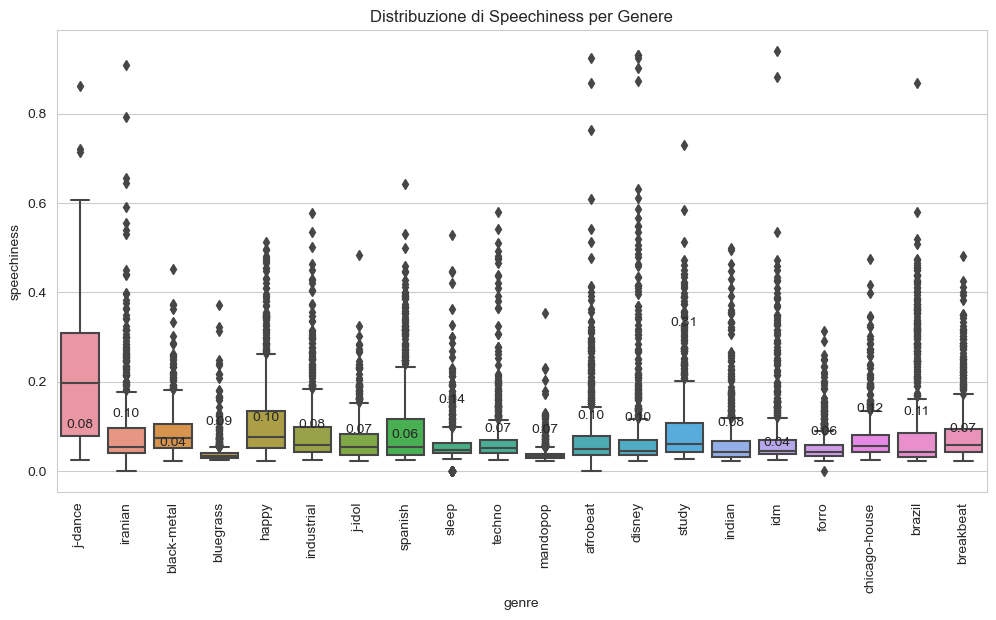

C:\Users\Alma\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alma\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alma\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alma\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alma\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.1% of the points cann

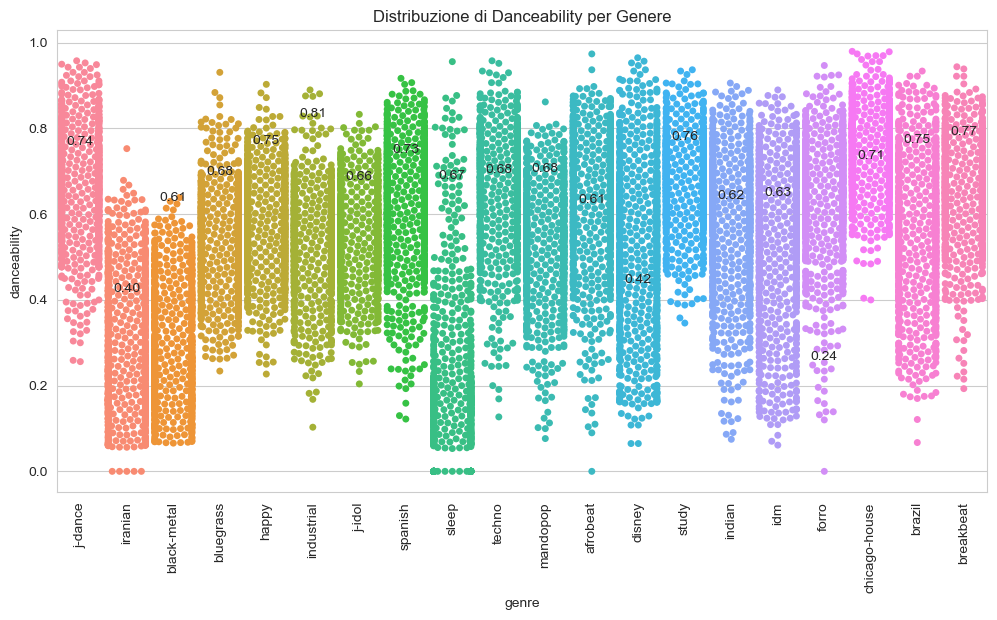

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati dal file CSV
df = pd.read_csv('no_ms_train.csv')

# Boxplot con il valore del baffo superiore (0.75)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='genre', y='speechiness')
plt.title('Distribuzione di Speechiness per Genere')
plt.xticks(rotation=90)

# Calcola e aggiungi il valore del baffo superiore (0.75) per ciascun genere
grouped_data = df.groupby('genre')['speechiness'].quantile(0.75).reset_index()
for i in range(len(grouped_data)):
    plt.text(i, grouped_data['speechiness'][i] + 0.01, f"{grouped_data['speechiness'][i]:.2f}", ha='center', va='bottom')

plt.show()

# Swarmplot con il valore del baffo superiore (0.75)
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='genre', y='danceability')
plt.title('Distribuzione di Danceability per Genere')
plt.xticks(rotation=90)

# Calcola e aggiungi il valore del baffo superiore (0.75) per ciascun genere
grouped_data = df.groupby('genre')['danceability'].quantile(0.75).reset_index()
for i in range(len(grouped_data)):
    plt.text(i, grouped_data['danceability'][i] + 0.01, f"{grouped_data['danceability'][i]:.2f}", ha='center', va='bottom')

plt.show()
